<a href="https://www.kaggle.com/code/abdulsamad4576/heart-disease-predictor-model-detailed?scriptVersionId=160015575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Predictor

- Talha Majeed (21L-5292)
- Abdul Samad (21L-5089)
- Mustafa Ahsan (21L-7738)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1><center> TABLE OF CONTENTS </center></h1>
 
### [**1. Importing Libraries + Loading Data**](#title-one)

### [**2. Exploratory Data Analysis**](#title-two)
    
### [**3. Preprocessing**](#title-three)

### [**4. Model Selection**](#title-four)
    
### [**5. Model Training and Evaluation**](#title-five) 
    
### [**6. Conclusion**](#title-six)

<a id="title-one"></a>
<h1><center>Importing Libraries + Loading Data</center></h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
df2=pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

In [3]:
df2.head()
df=df2.copy()

In [4]:
df2.head(50)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [5]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df2['AgeCategory'] = df2['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df2['AgeCategory'] = df2['AgeCategory'].astype('float')
df2.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df2.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,54.355759,7.097075
std,6.356100,7.95085,7.955235,17.720429,1.436007
min,12.020000,0.00000,0.000000,21.000000,1.000000
25%,24.030000,0.00000,0.000000,42.000000,6.000000
50%,27.340000,0.00000,0.000000,57.000000,7.000000
75%,31.420000,2.00000,3.000000,67.000000,8.000000
max,94.850000,30.00000,30.000000,80.000000,24.000000


In [7]:
df2.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df2.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  float64
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df2.shape

(319795, 18)

In [11]:
df2.value_counts('HeartDisease')

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

<a id="title-two"></a>
<h1><center>Exploratory Data Analysis</center></h1>

- Contains imbalanced data
- Features like "Stroke", "DiffWalking", "AgeCategory", and perhaps "Diabetic" added more impact towards the higher Target variable prediction rate.
- "Sex" and "Race" also seem to have lower correlation values, suggesting a weaker direct relationship with heart disease in this dataset that means we can drop these features in future

*NOTE:*

- Mental Health: People who reported around 0 days where they had a bad mental health were less in propotion in people who had Heart Diseases even though number of people with heart disease is also relatively high in that group but that maybe due to the fact that more people were tested in that group


<function matplotlib.pyplot.show(close=None, block=None)>

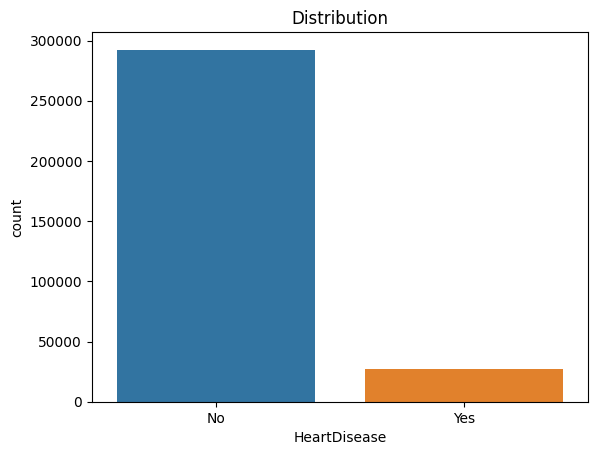

In [12]:
sns.countplot(x="HeartDisease", data=df2)
plt.title("Distribution")
plt.show

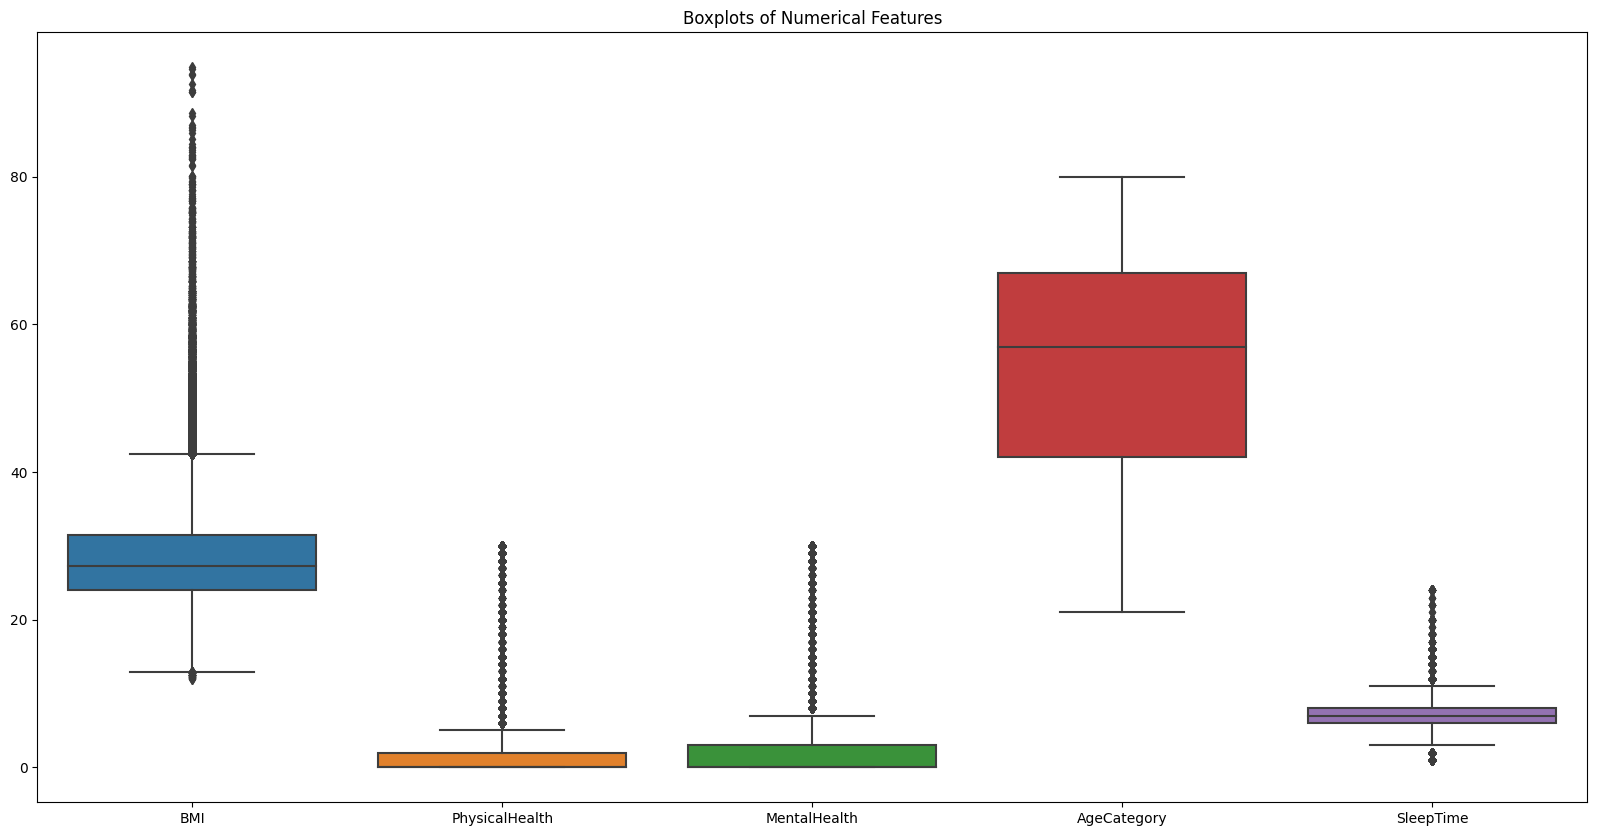

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2)
plt.title('Boxplots of Numerical Features')
plt.show()

In [14]:
cat_data=df2.select_dtypes(include='object')
num_data=df2.select_dtypes(exclude='object')
print("categorical features: ", cat_data.columns.to_list())
print("numerical features: ", num_data.columns.to_list())
df2.head()

categorical features:  ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
numerical features:  ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No


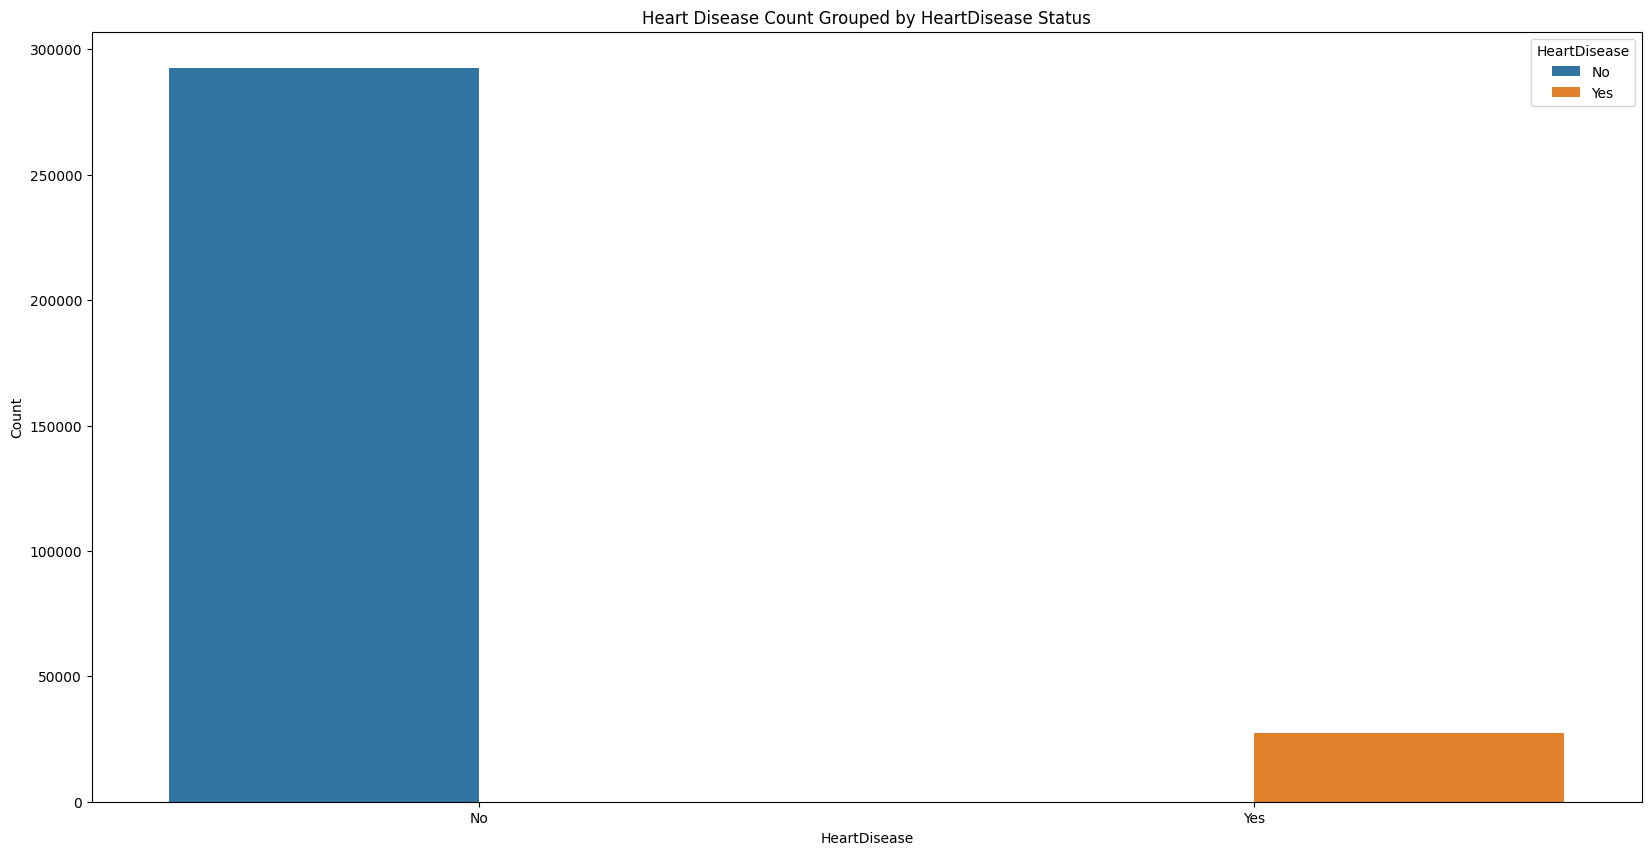

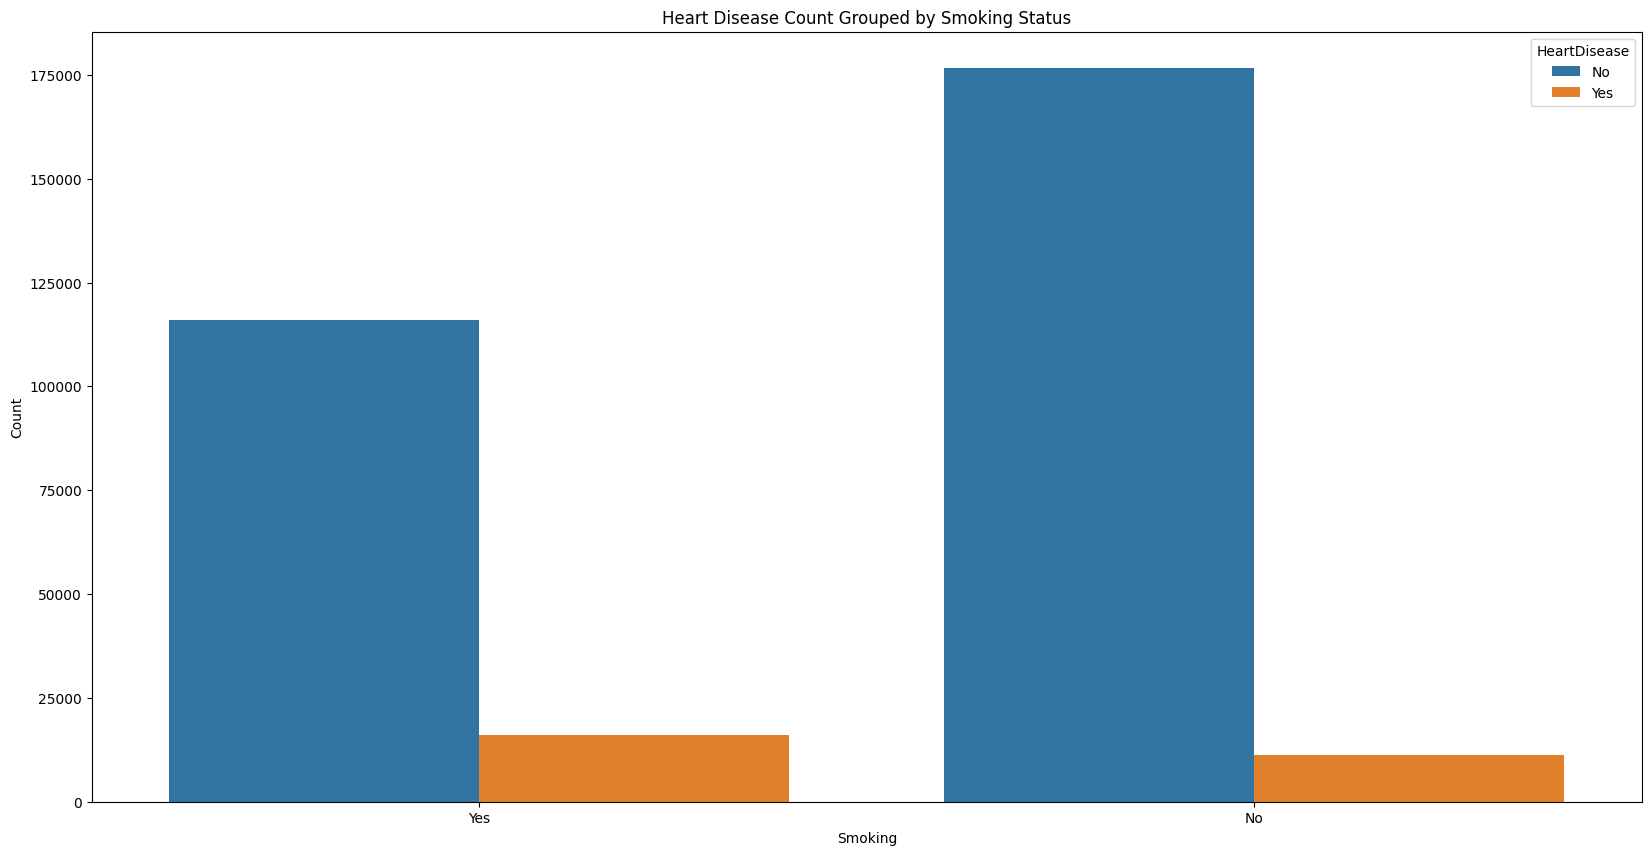

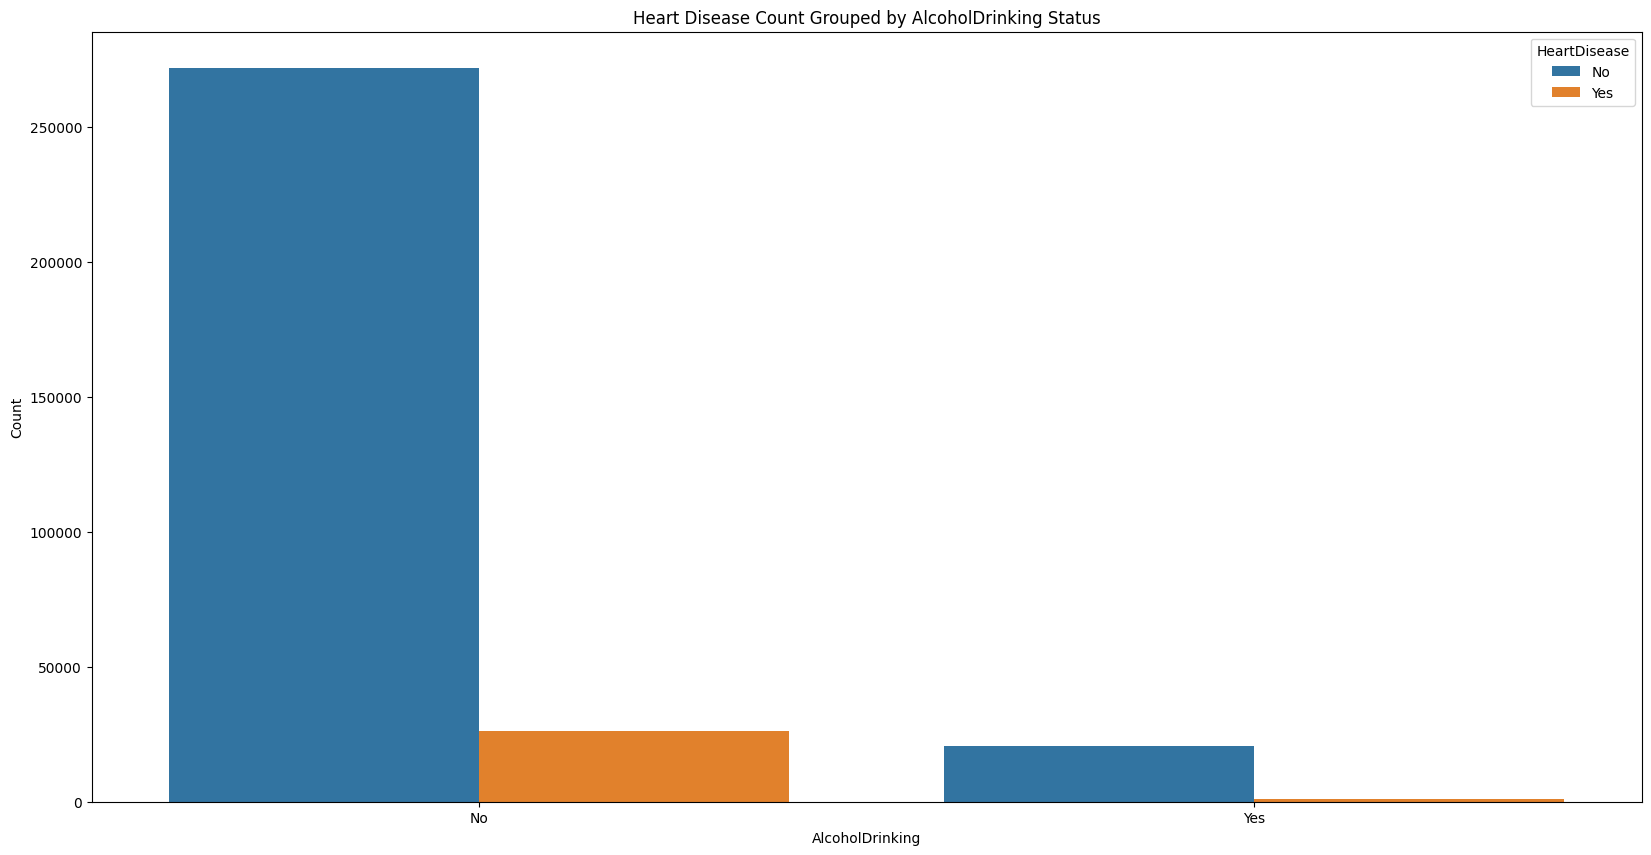

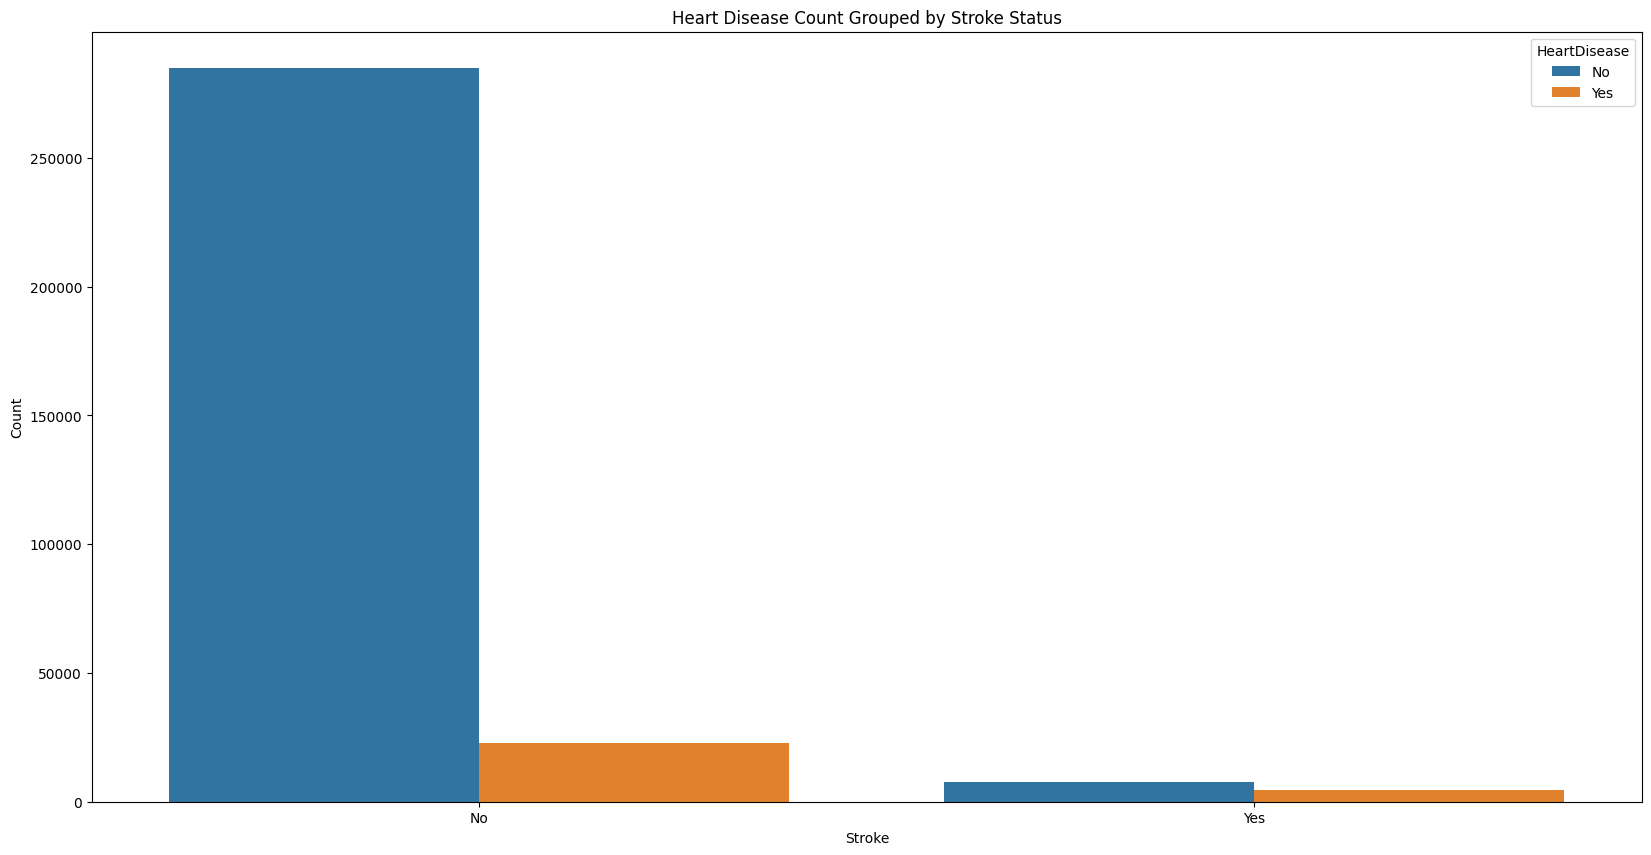

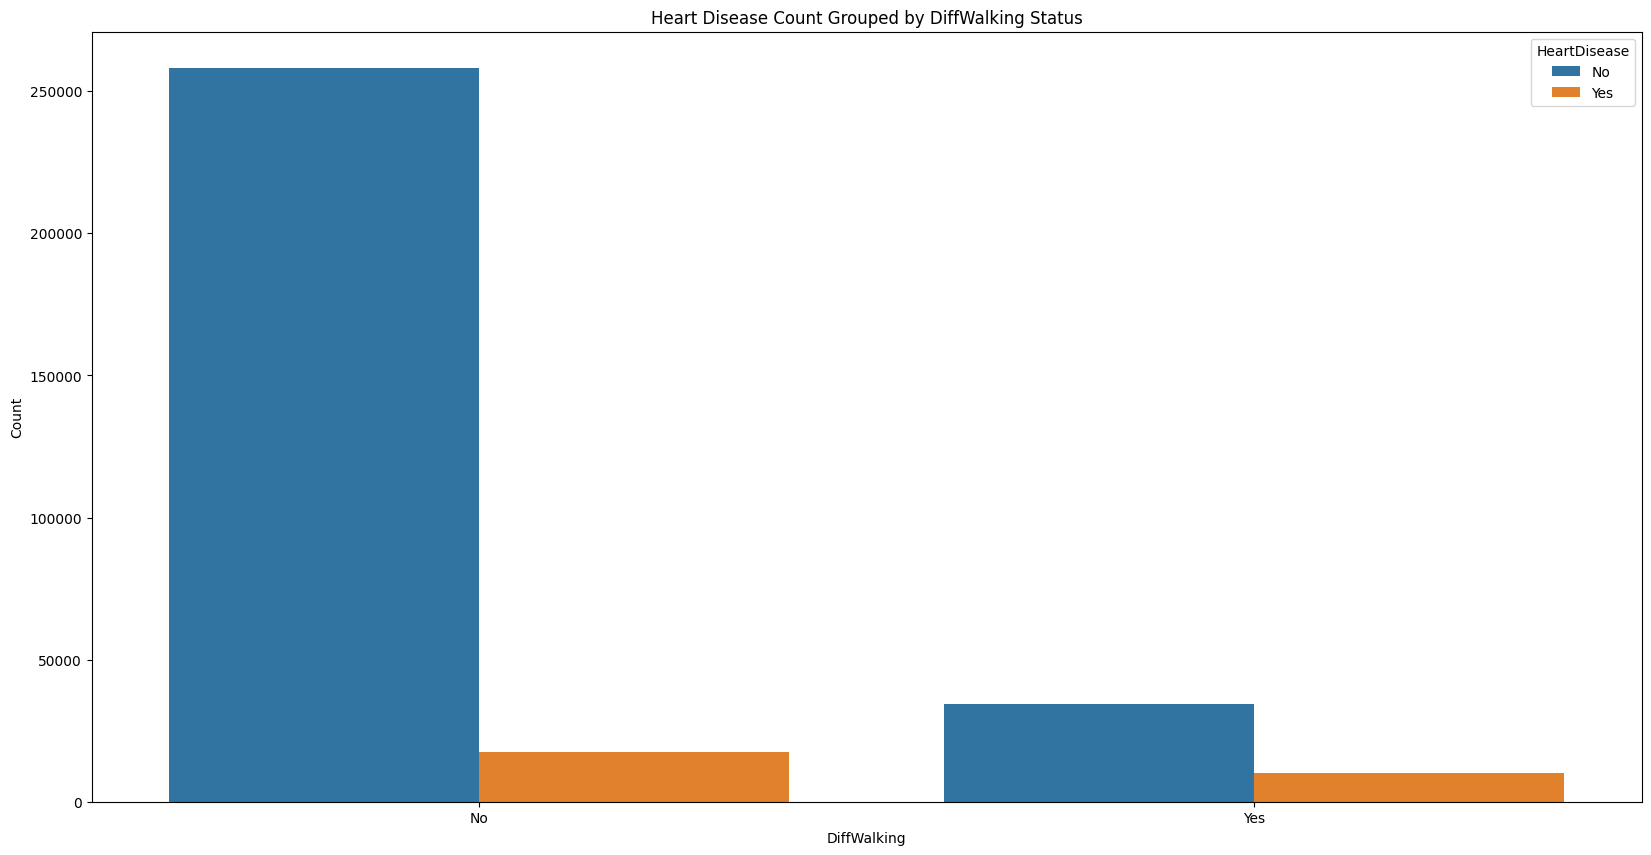

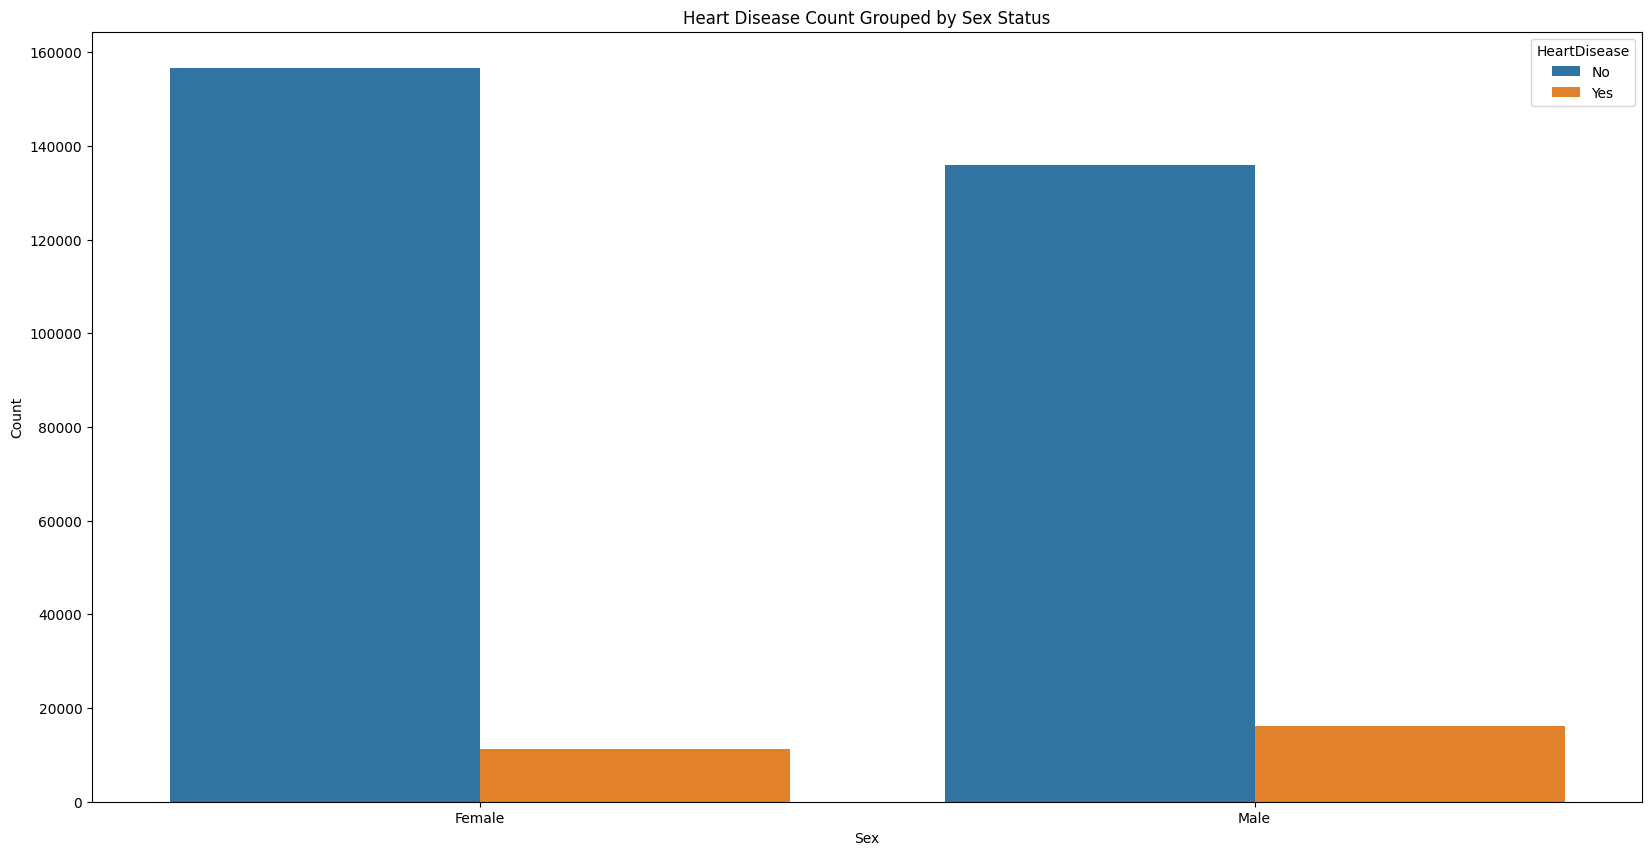

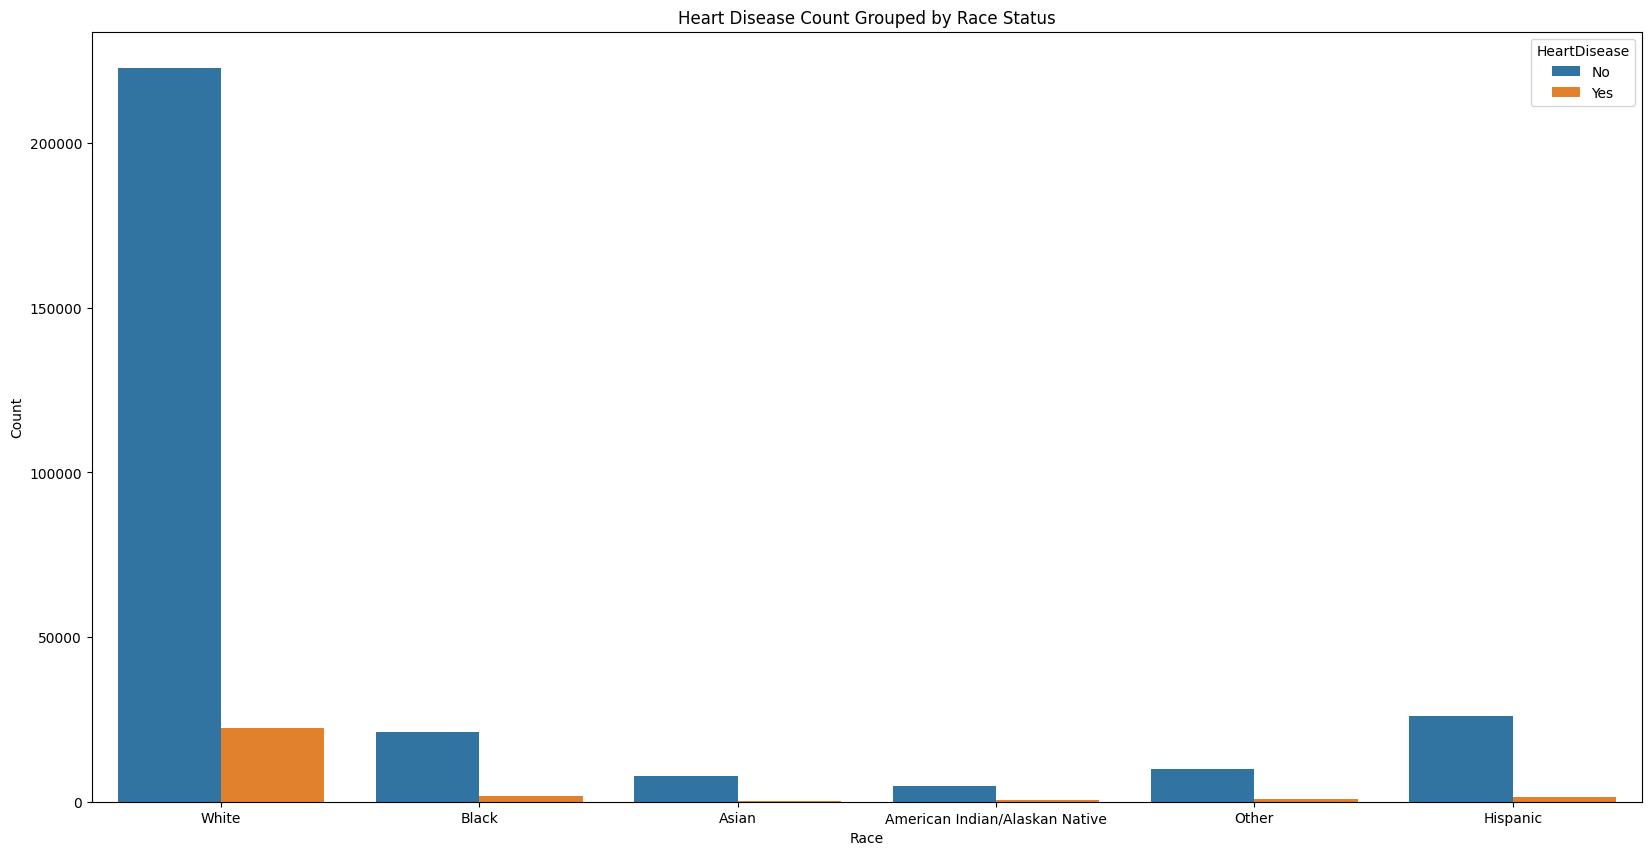

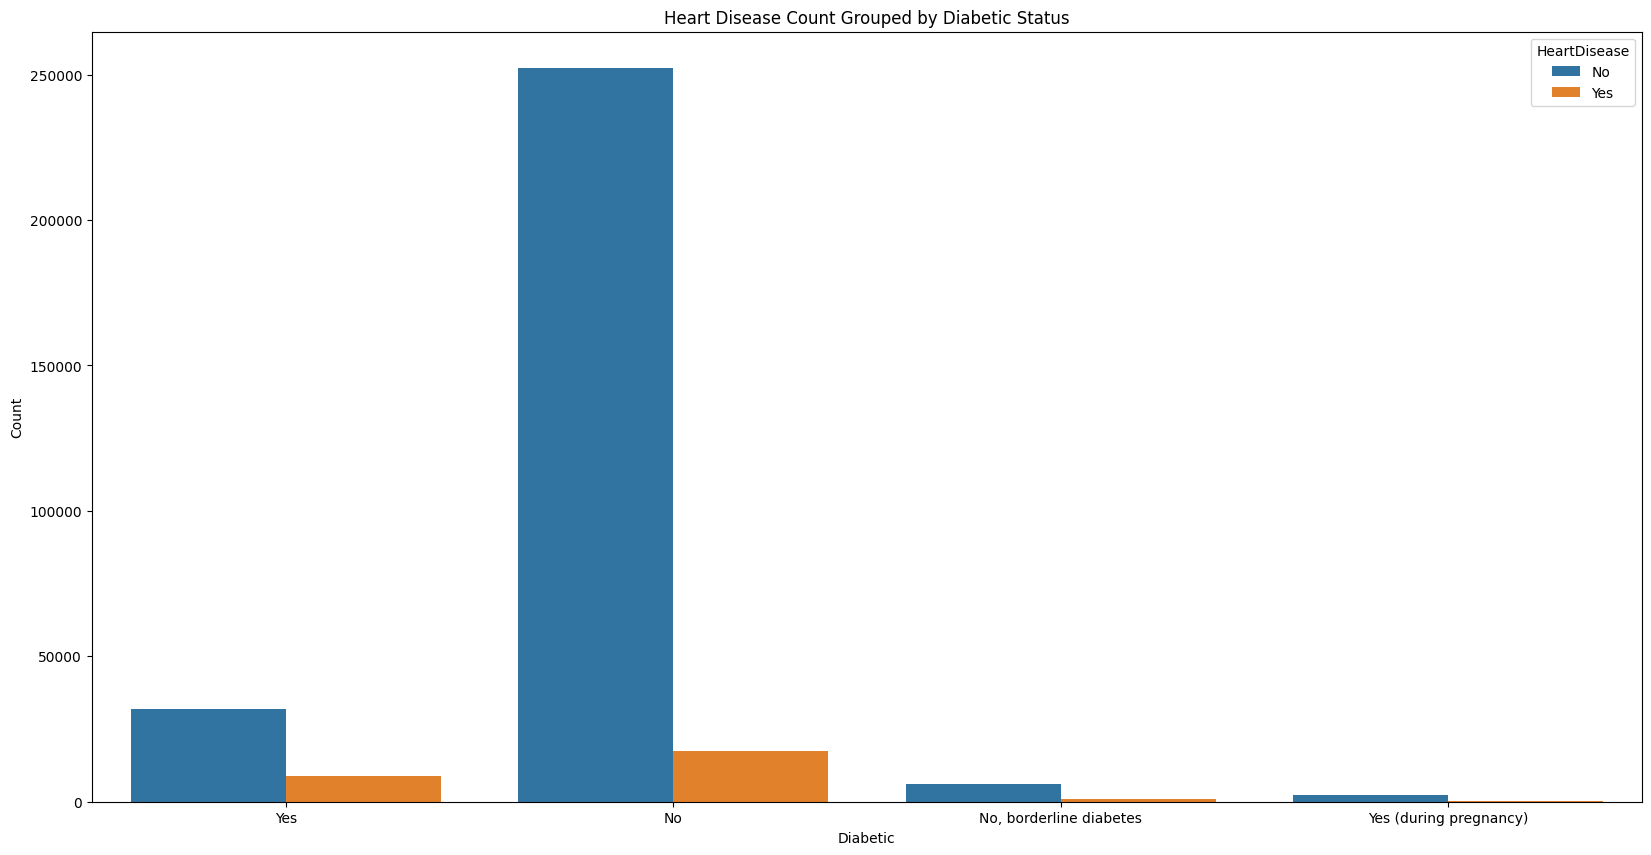

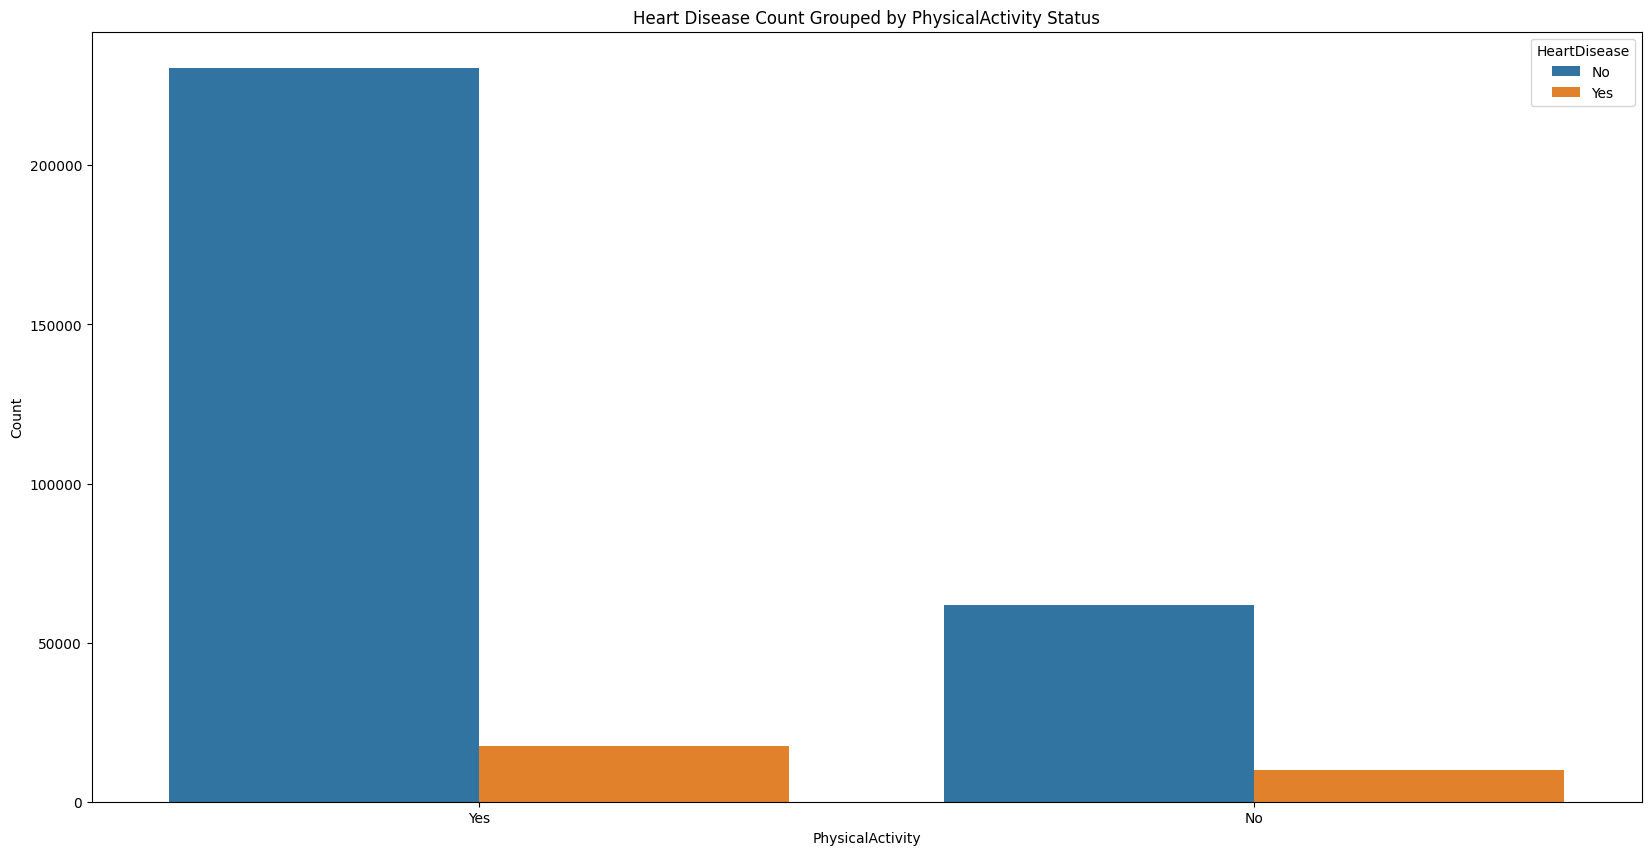

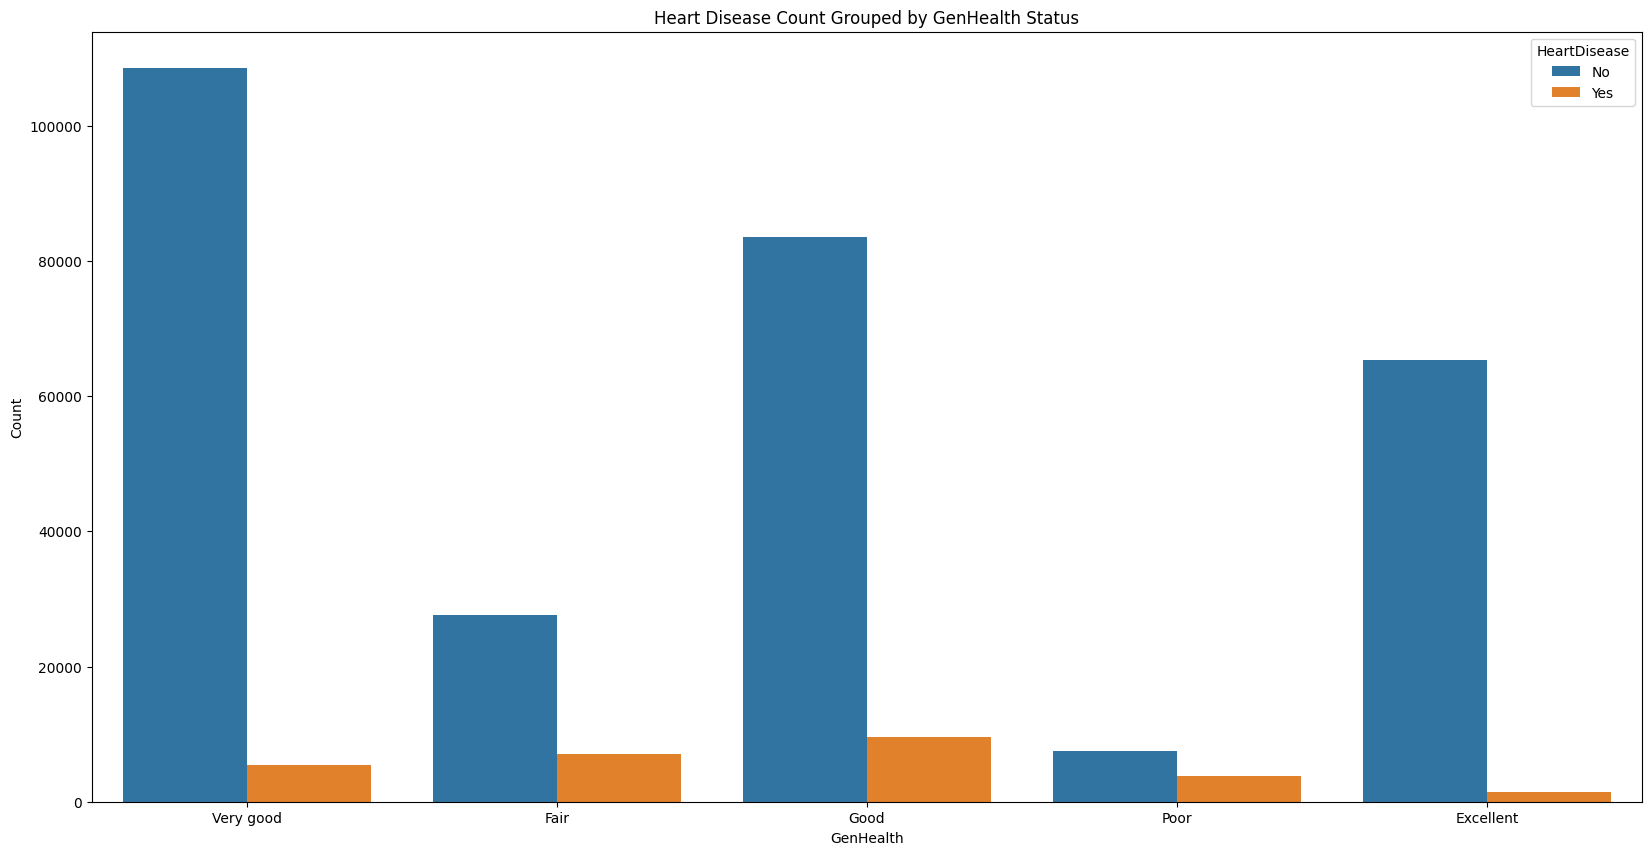

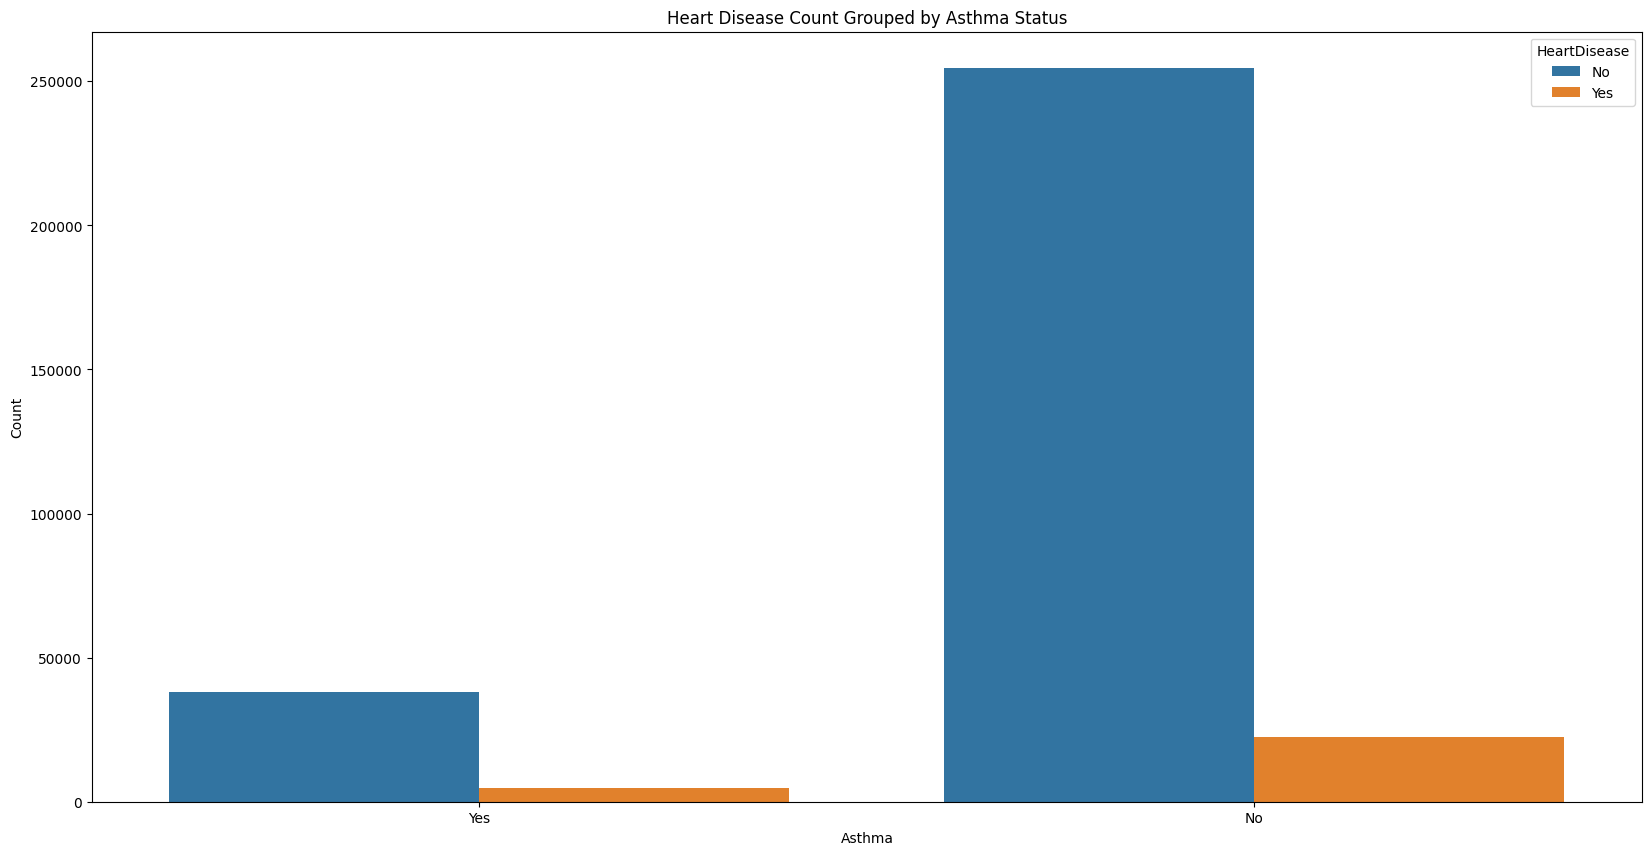

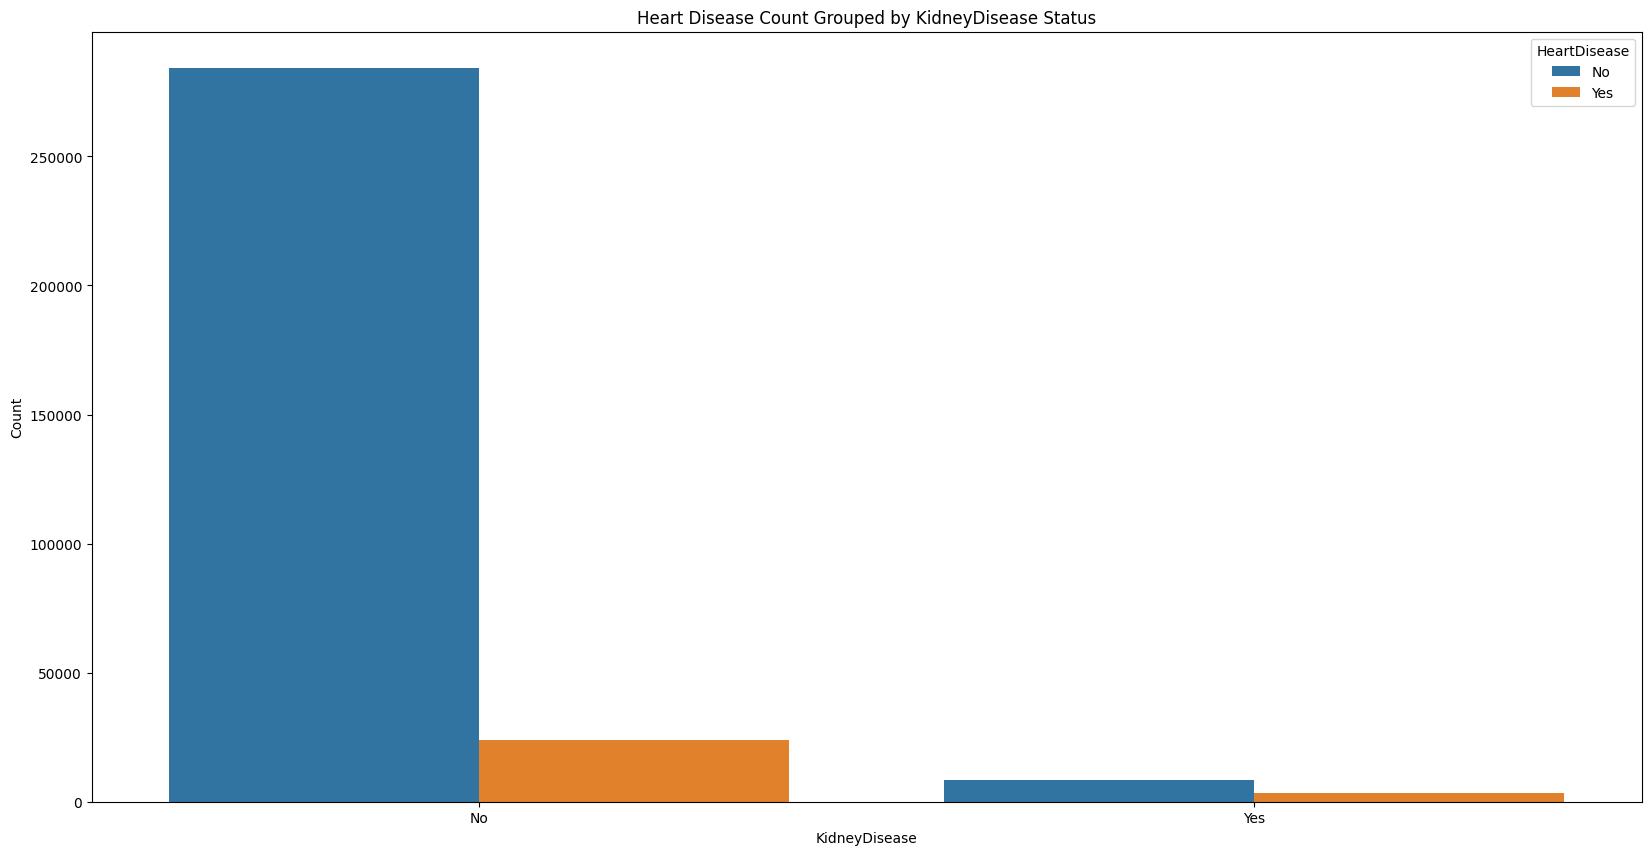

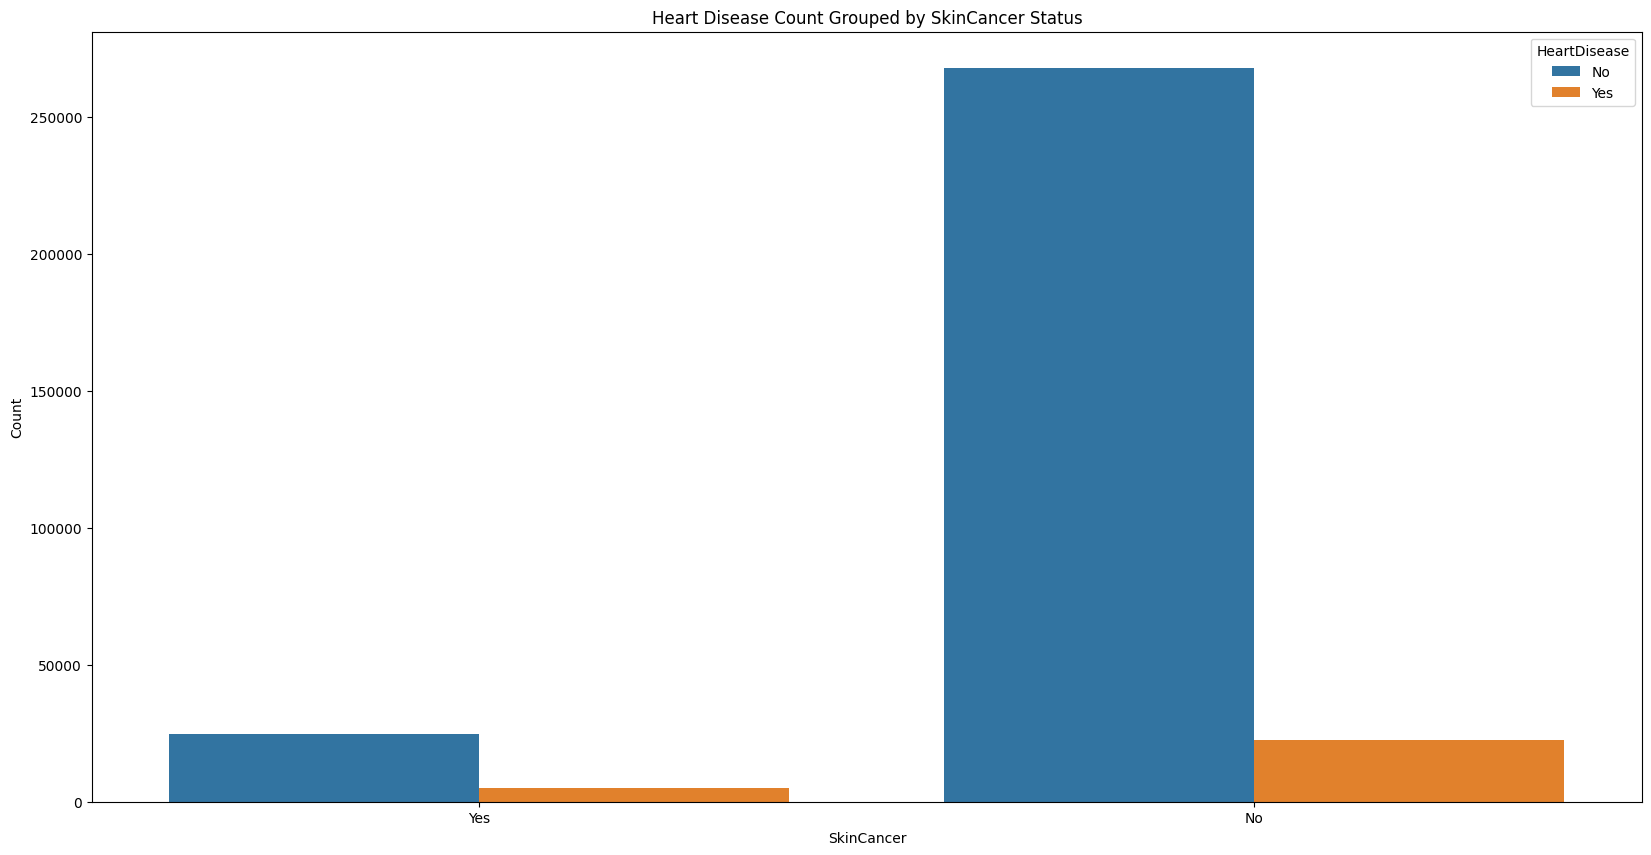

In [15]:
for c in cat_data:
    plt.figure(figsize=(20,10))
    sns.countplot(x=c, hue='HeartDisease', data=df)
    plt.title(f'Heart Disease Count Grouped by {c} Status')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()


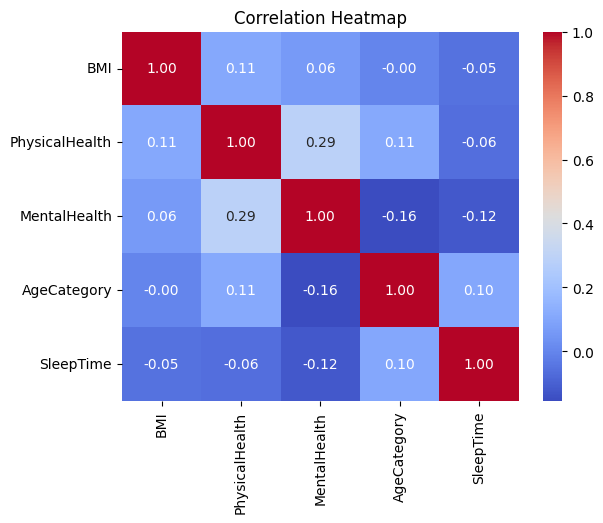

In [16]:
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


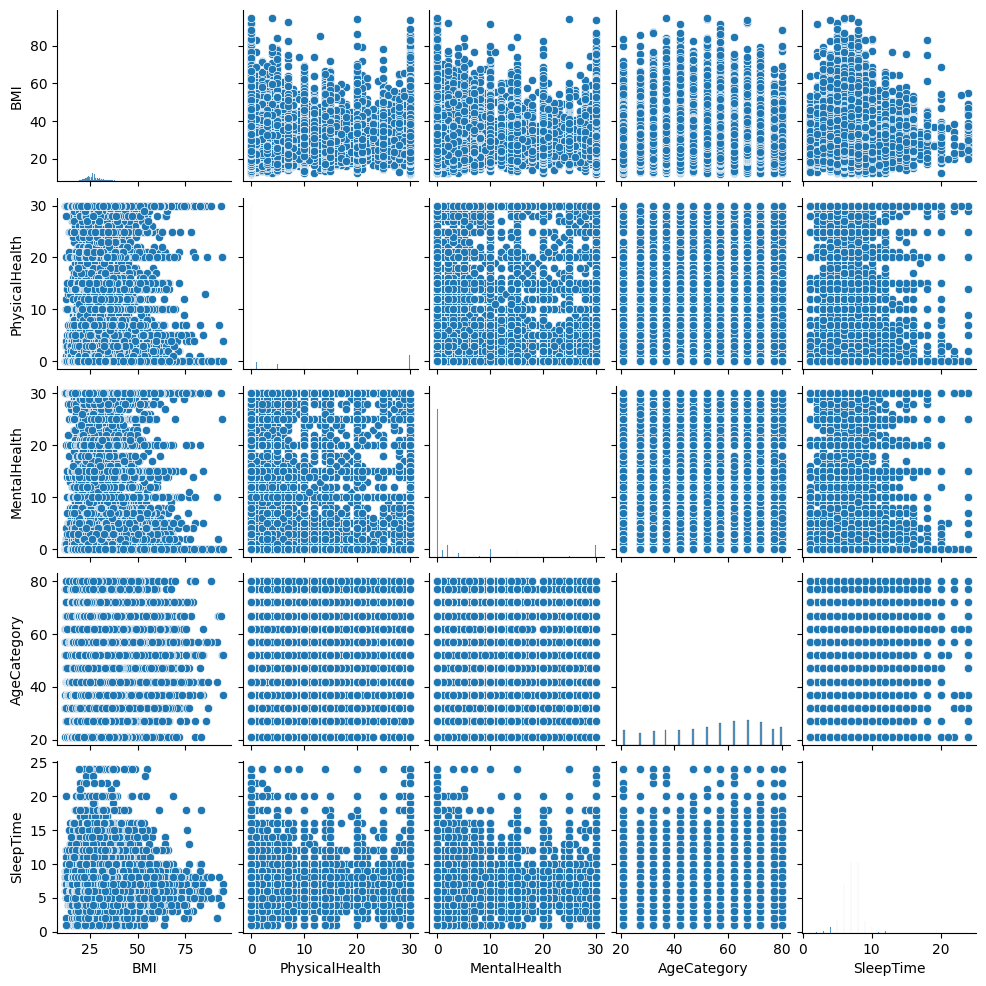

In [17]:

sns.pairplot(df2,height=2)
plt.show()

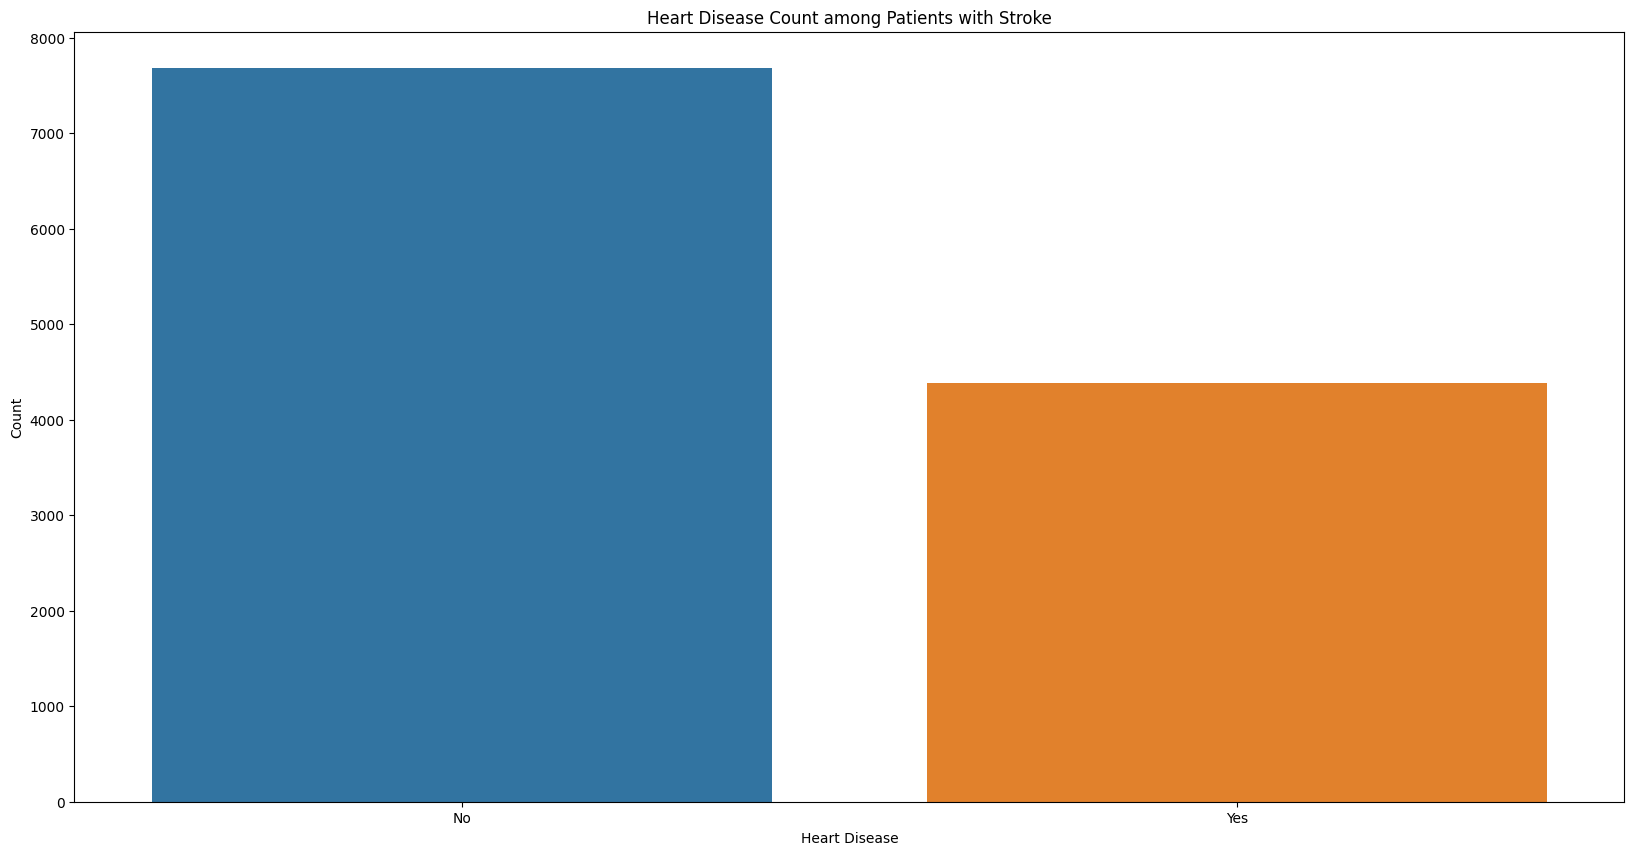

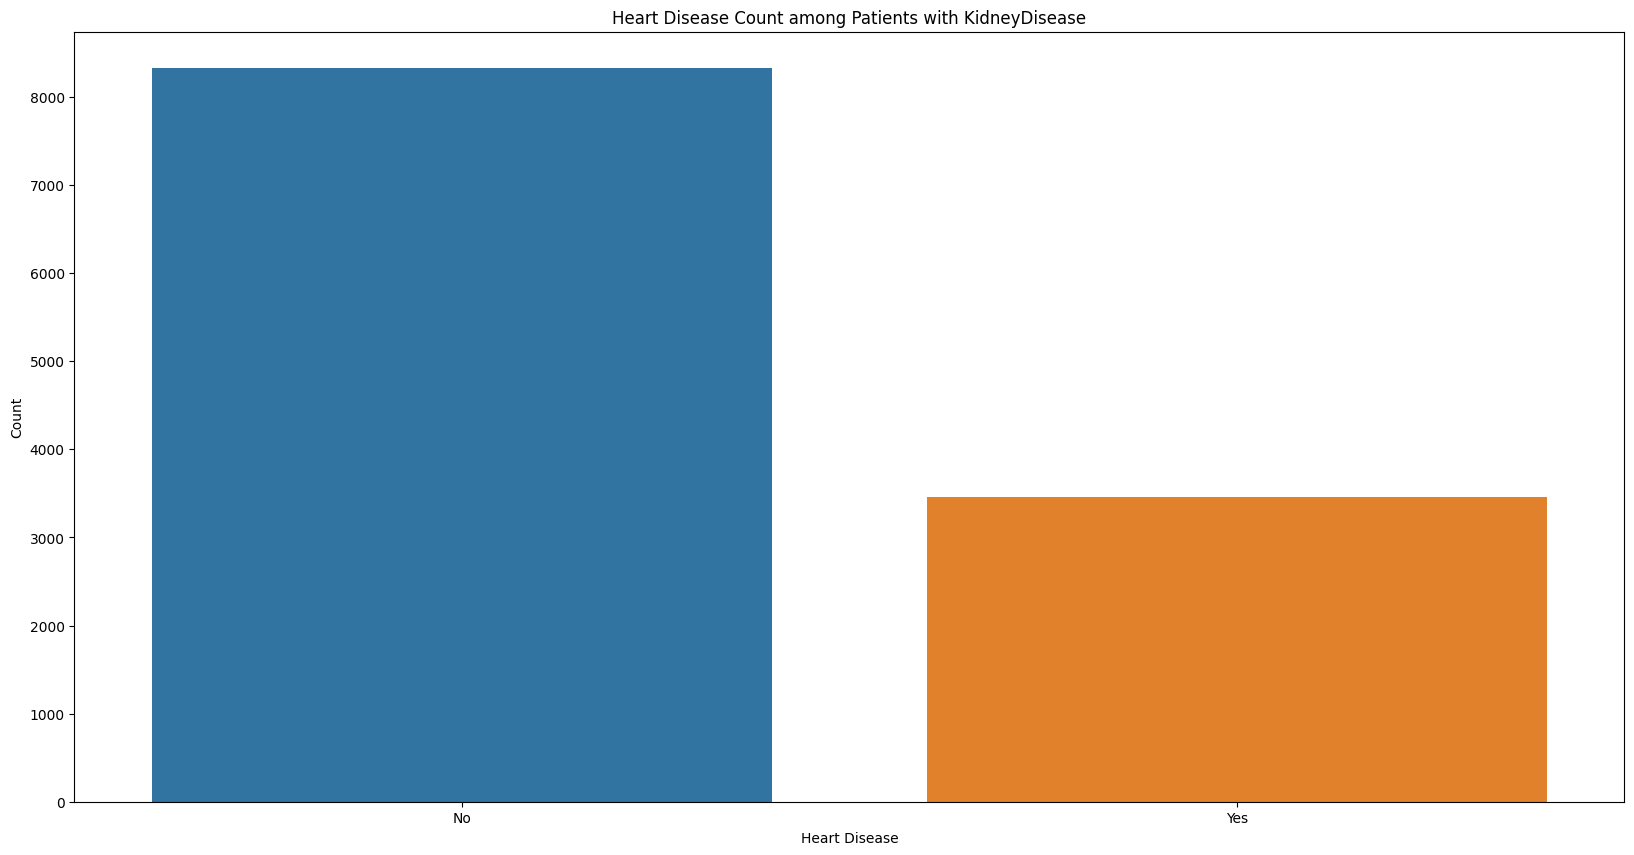

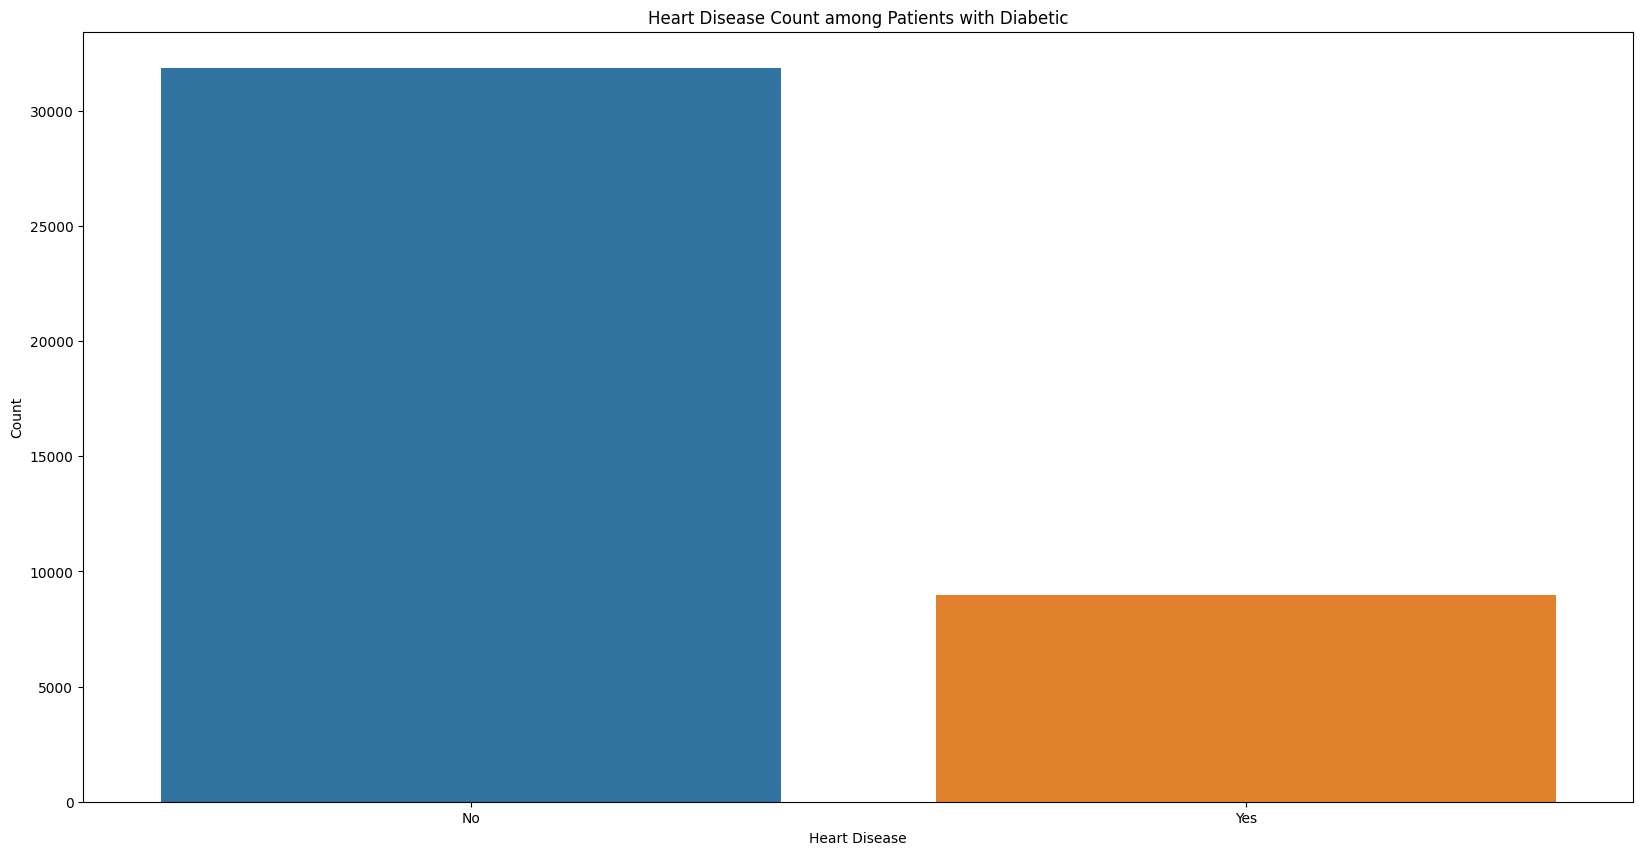

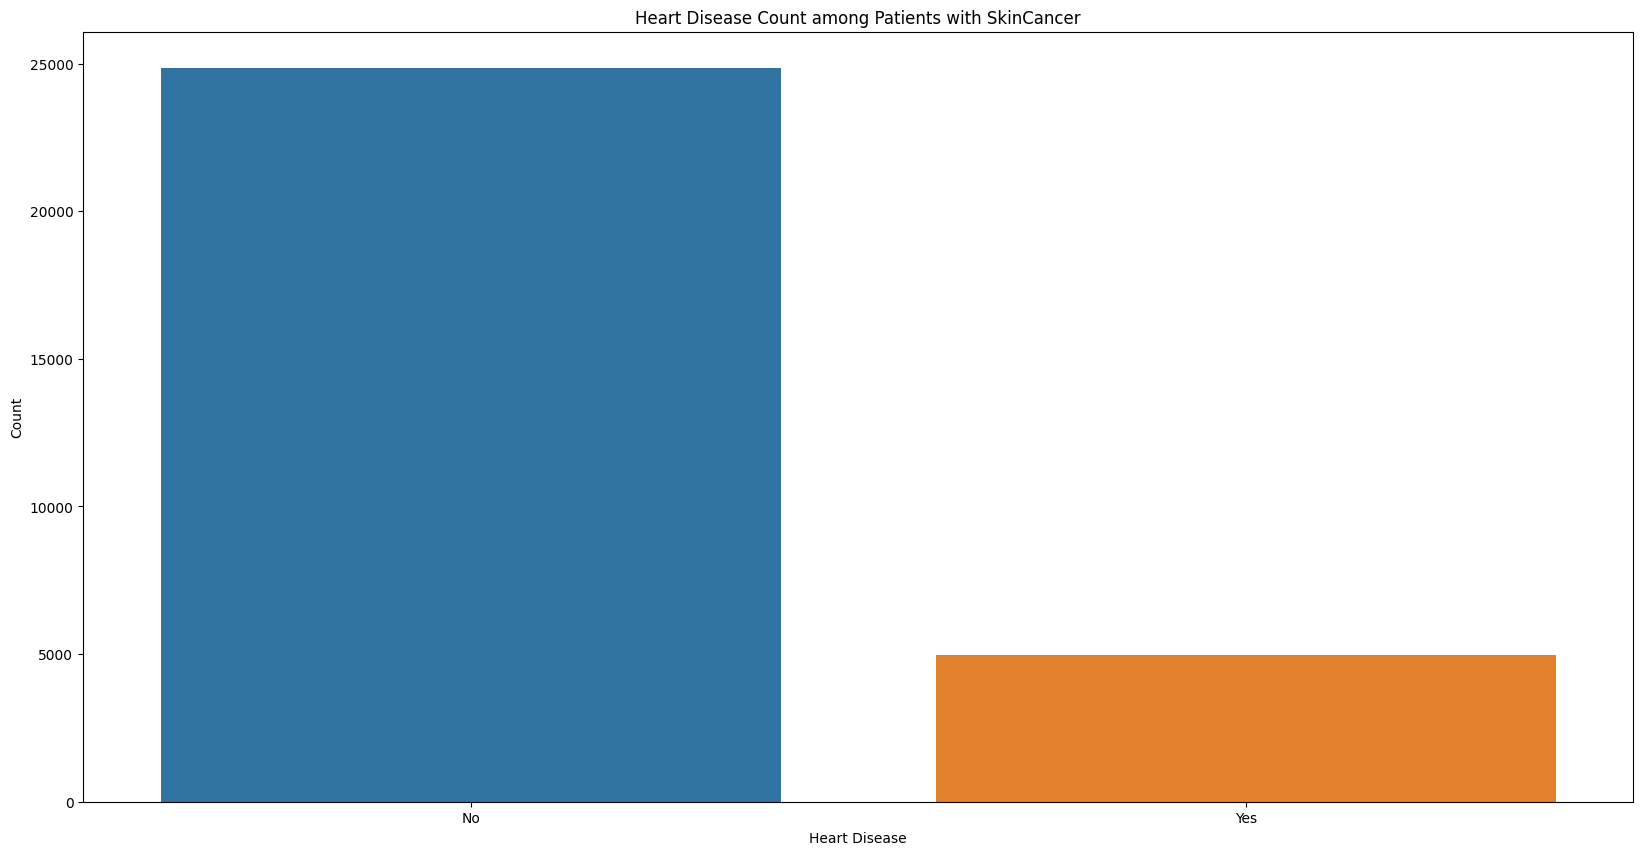

In [18]:
disease=['Stroke','KidneyDisease','Diabetic','SkinCancer']
for d in disease:
    df_filtered = df2[df2[d] == 'Yes']
    
    if not df_filtered.empty:
        plt.figure(figsize=(20,10))
        sns.countplot(x='HeartDisease', data=df_filtered)
        plt.title(f'Heart Disease Count among Patients with {d}')
        plt.xlabel('Heart Disease')
        plt.ylabel('Count')
        plt.show()

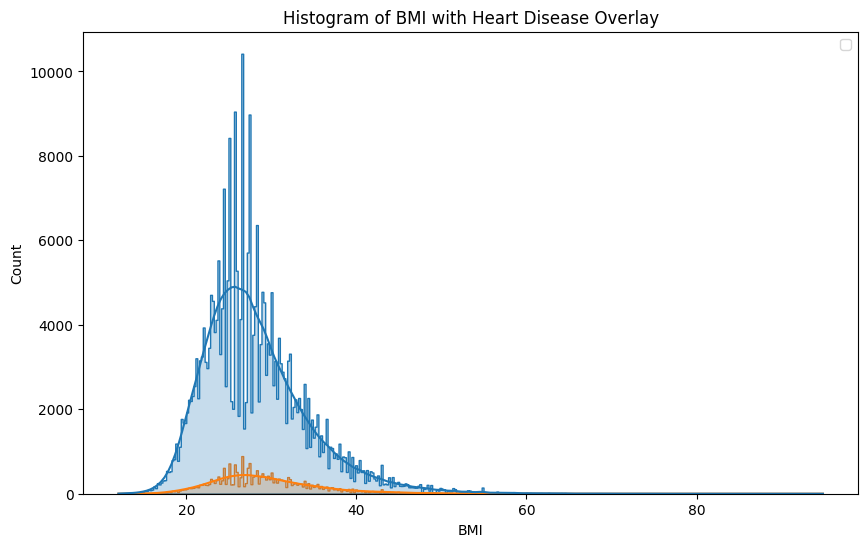

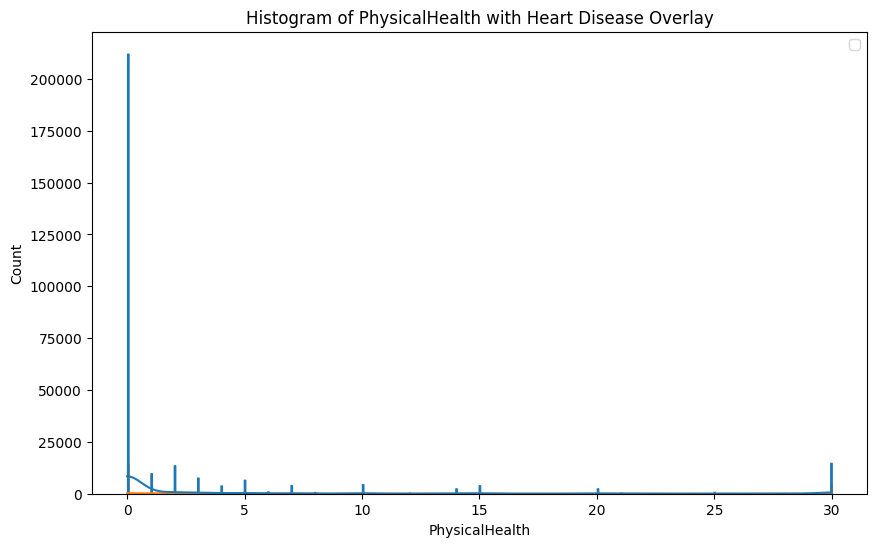

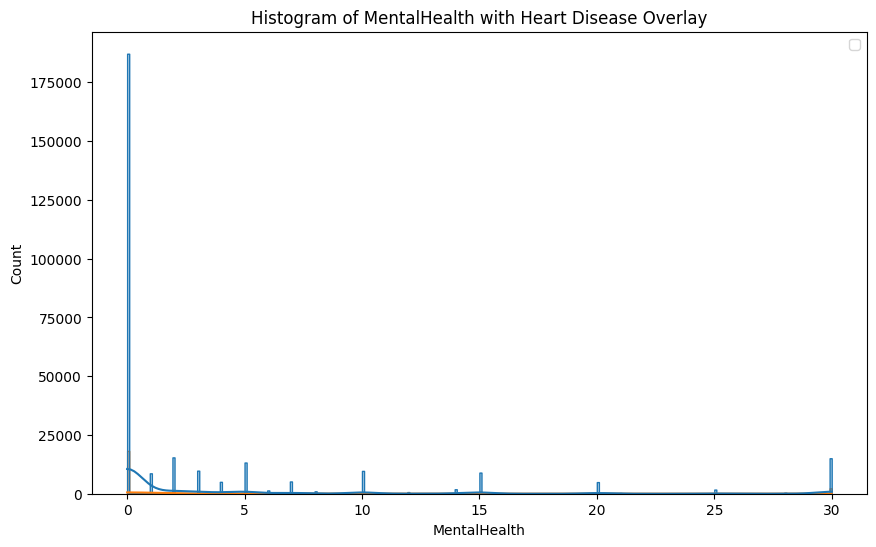

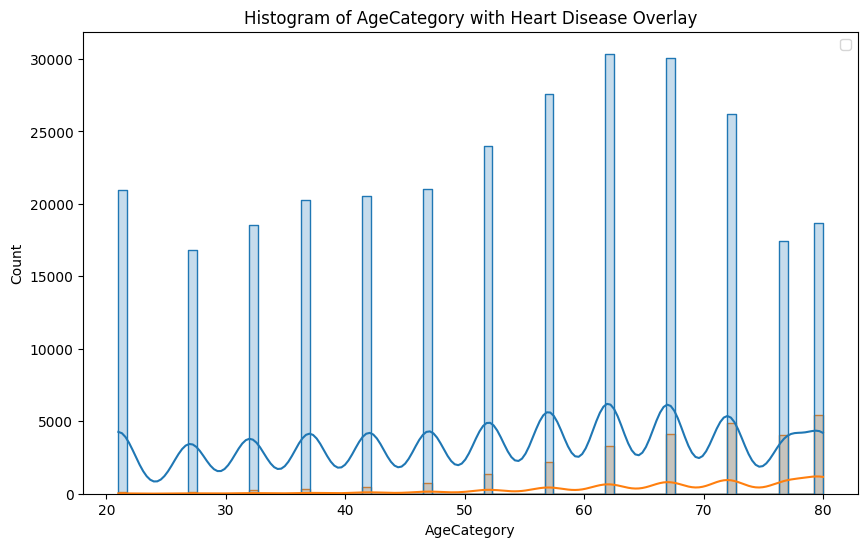

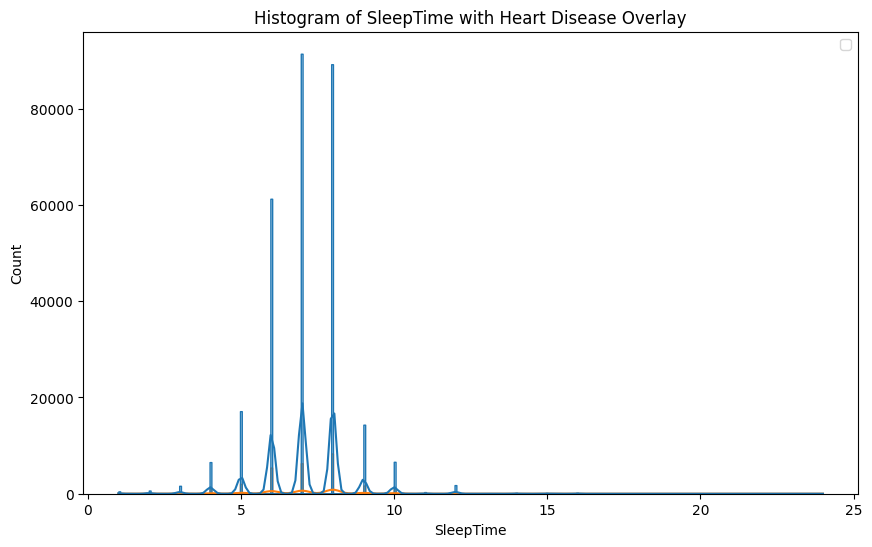

In [19]:
for feature in num_data:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df2, x=feature, hue='HeartDisease', kde=True, element='step', stat='count')
    plt.title(f'Histogram of {feature} with Heart Disease Overlay')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

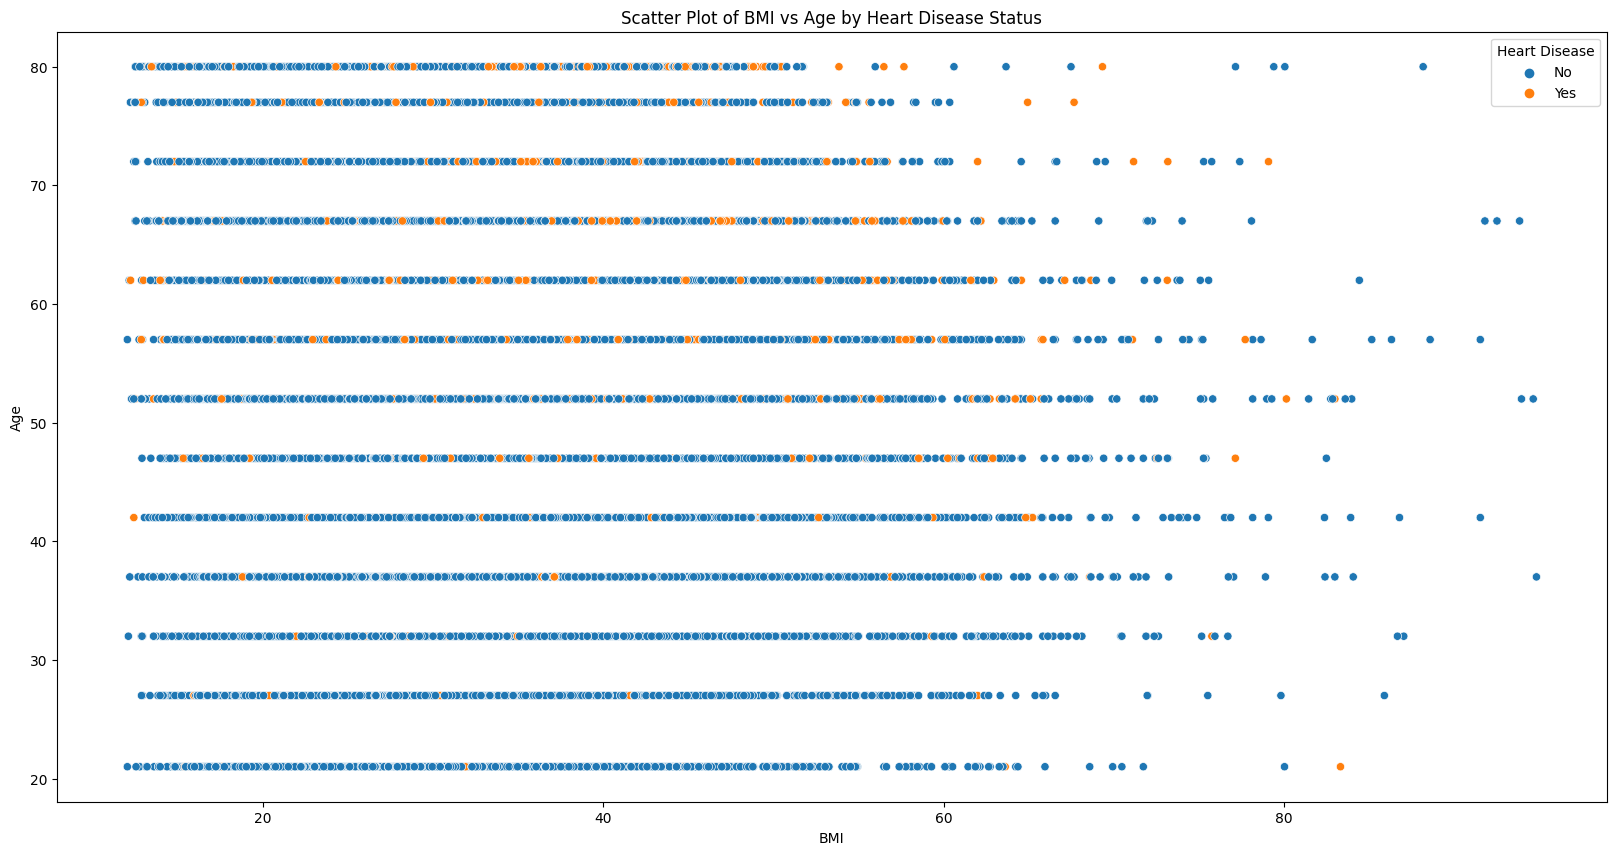

In [20]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df2, x='BMI', y='AgeCategory', hue='HeartDisease')
plt.title('Scatter Plot of BMI vs Age by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend(title='Heart Disease')
plt.show()

In [21]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

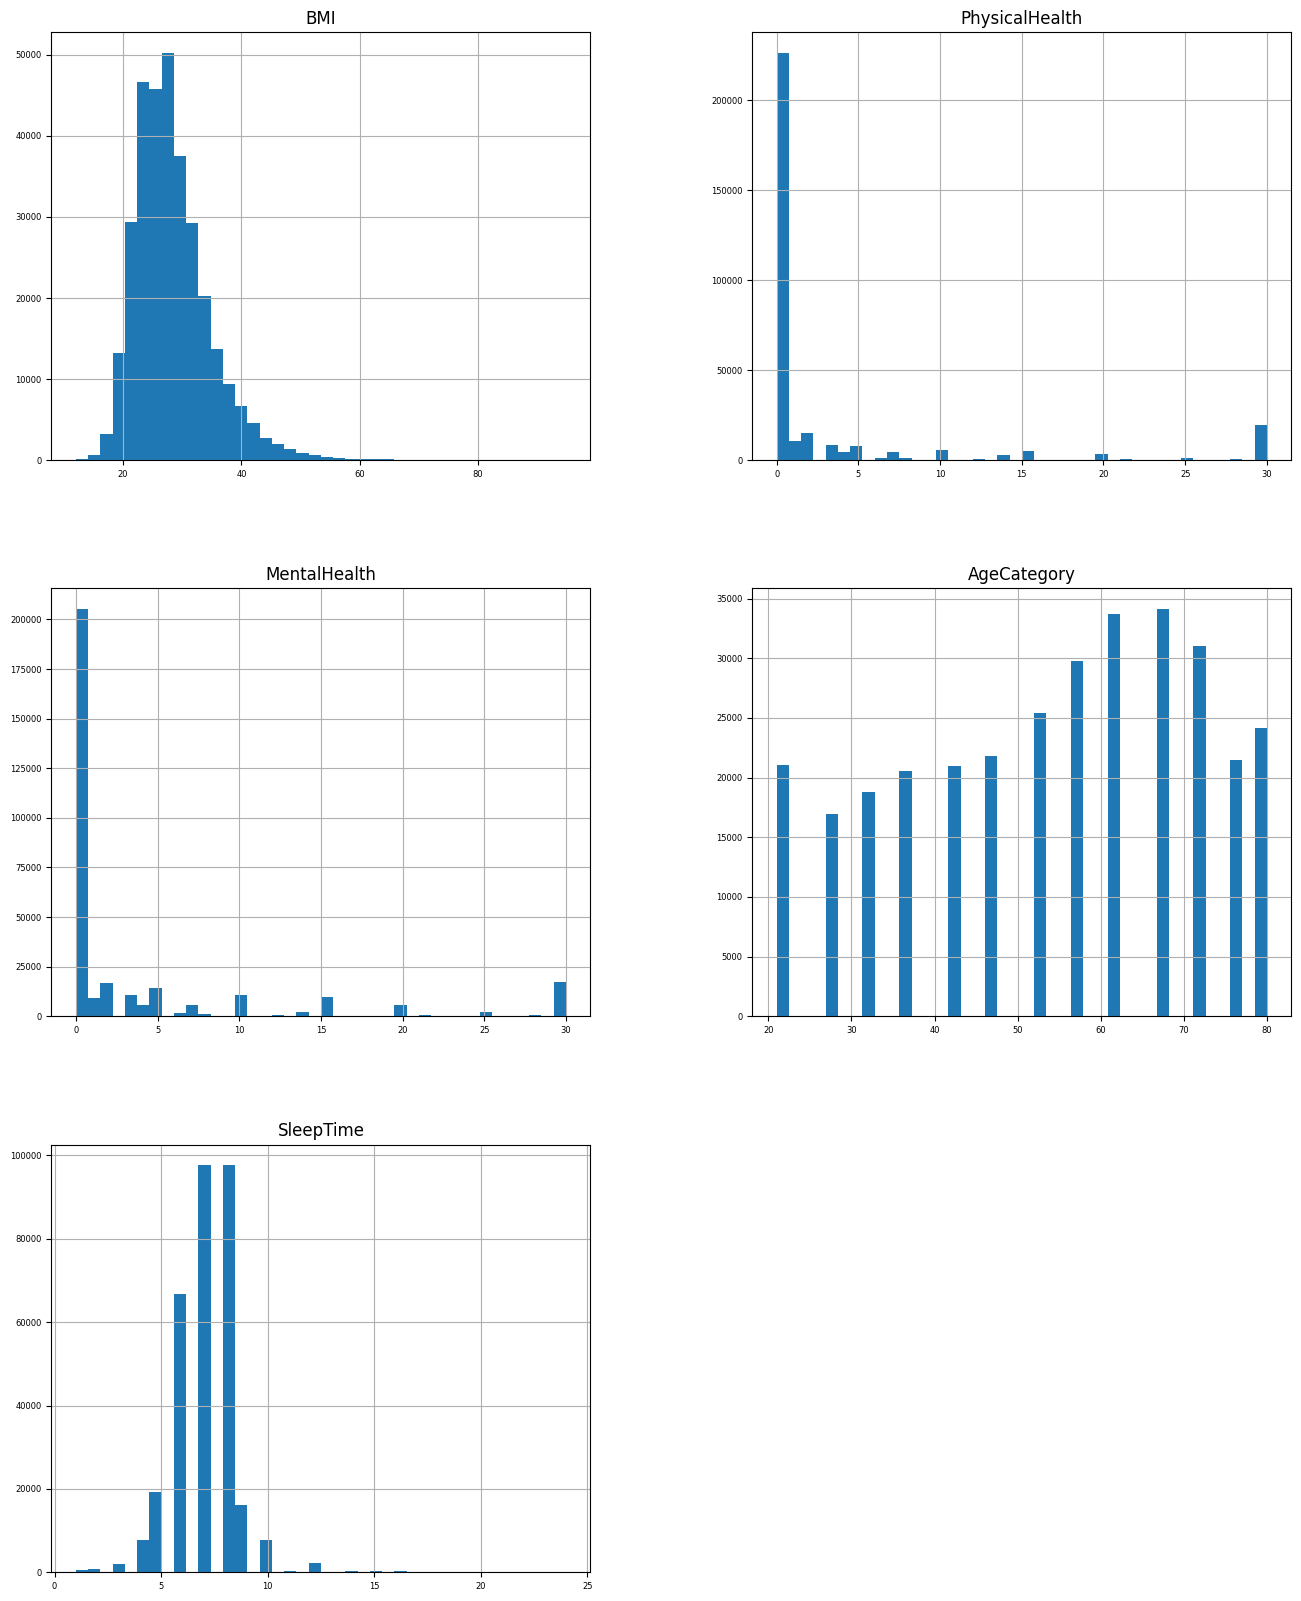

In [22]:
num_data.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

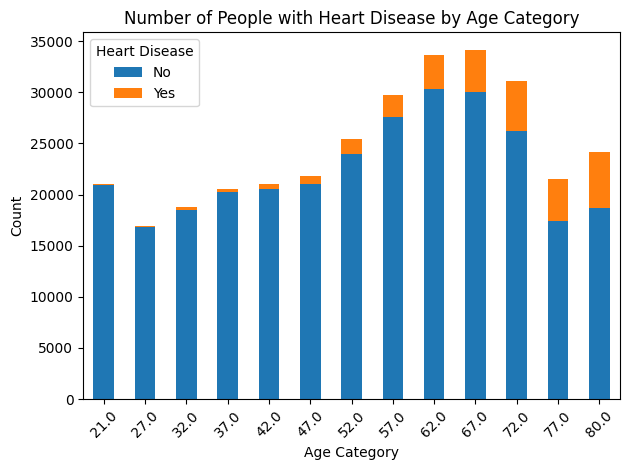

In [23]:
age_heart_disease = df2.groupby('AgeCategory')['HeartDisease'].value_counts().unstack().fillna(0)

age_heart_disease.plot(kind='bar', stacked=True)
plt.title('Number of People with Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout() 
plt.show()

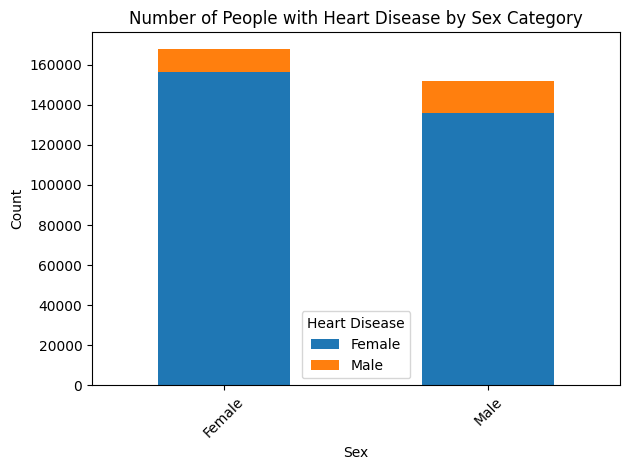

In [24]:
sex_heart_disease = df2.groupby('Sex')['HeartDisease'].value_counts().unstack().fillna(0)

sex_heart_disease.plot(kind='bar', stacked=True)
plt.title('Number of People with Heart Disease by Sex Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Heart Disease', labels=['Female', 'Male'])
plt.tight_layout() 
plt.show()

<a id="title-three"></a>
<h1><center>Preprocessing</center></h1>

- Encoded with Label Encoder
- RobustScaler is used to minimize the skewness of outliers
    - No outliers were removed as they were in fair amount i.e. important for analyzing
- Oversampling with SMOTE to handle imbalance of majority class

In [25]:

label_encoder = preprocessing.LabelEncoder() 
for c in cat_data:
    df2[c]= label_encoder.fit_transform(df2[c]) 
    df2[c].unique()
    
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,5,0,1,4,8.0,0,0,0


In [26]:
race_groups = df.groupby('Race')['HeartDisease'].value_counts(normalize=True).unstack(fill_value=0)
race_groups['Ratio'] = race_groups['Yes'] / race_groups['No']
print(race_groups[['Ratio']])

HeartDisease                       Ratio
Race                                    
American Indian/Alaskan Native  0.116309
Asian                           0.034094
Black                           0.081518
Hispanic                        0.055494
Other                           0.088229
White                           0.101062


As there isnt any difference in ratio of heart disease, which shows that race doesnt have any effect on heart diseases in a person

In [27]:
df2 = df2.drop('Race', axis=1)

In [28]:
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,0,1,4,8.0,0,0,0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  float64
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

## Resampling and splitting
- We tried two different approaches to solve the problem of imbalance of data after the application of Robust Scaler
    - First, we applied SMOTE only on Train datasets to handle imbalancing, it resulted in a high f1 score for the majority class but a low one for the minority one
    - Second, we also tried to apply SMOTE on whole dataset which actually resulted in a high f1 score of about 93% for both majority and minority class

In [30]:
X = df2.drop('HeartDisease', axis=1) 
y = df2['HeartDisease'] 

smote = SMOTE(random_state=42)
scaler=RobustScaler()
scaled_data=scaler.fit_transform(X)
x2= pd.DataFrame(scaled_data, columns=X.columns)
X_resampled, y_resampled = smote.fit_resample(x2, y)




In [31]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [32]:
x_train_non,x_test_non,y_train_non,y_test_non = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
x_train_smote, y_train_smote = smote.fit_resample(x_train_non, y_train_non)

In [34]:
scaler=RobustScaler()
scaled_data=scaler.fit_transform(x_train_non)
x_train_nonsmote= pd.DataFrame(scaled_data, columns=x_train_non.columns)
y_train_nonsmote=y_train_non
scaled_data=scaler.fit_transform(x_test_non)
x_test_robust=pd.DataFrame(scaled_data, columns=x_test_non.columns)
x_train_robust, y_train_robust = smote.fit_resample(x_train_nonsmote, y_train_nonsmote)

<a id="title-four"></a>
<h1><center>Model Selection</center></h1>

##### Why we chose tree based machine algorithm over neural networks?
Because NNs work better on smoother relations and our dataset was more strict.


- Logistic Regression
- Decision Trees
- KNN
- XGBoost
- Random Forest

In [35]:
logreg = LogisticRegression(max_iter=1000)

In [36]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [37]:
knn = KNeighborsClassifier()

In [38]:
xgb = XGBClassifier(n_estimators= 500 , max_depth= 3 , learning_rate = 0.1)

In [39]:
rf_sampled=RandomForestClassifier(n_estimators=77, max_depth=None, random_state=42,n_jobs=-1)
rf_nonsampled=RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42,n_jobs=-1,class_weight='balanced')

<a id="title-five"></a>
<h1><center>Model Training and evaluation</center></h1>

- Testing each model to select the best one for prediction
- ROC_AUC Score and its curve, Recall, F1, accuracy and precision score 
- We opted not to use StratifiedKFolds as we already dealt with imbalance in data through SMOTE 

In [40]:
def train_without_kfolds(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)

    prediction = classifier.predict(x_test)
    predicted_proba = classifier.predict_proba(x_test)[:, 1] 
    
    return prediction,predicted_proba
    

   

In [41]:
# def train_with_kfolds(classifier, x_train, y_train, x_test, y_test,n_splits=3):
#     classifier.fit(x_train, y_train)

#     prediction = classifier.predict(x_test)


#     kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     cv_scores = cross_val_score(classifier, x_train, y_train, cv=kf, scoring='roc_auc')
#     print("Cross Validation Score: ", '{0:.2%}'.format(cv_scores.mean()))

#     return prediction

In [42]:
def evaluating_model(model,y_test,y_pred,predicted_proba,step_factor=0.1,threshold=0):
    roc_score = 0
    threshold_value=threshold
    Original_AUC = roc_auc_score(y_test, prediction)
    while threshold_value <= 1:
        temp_thresh = threshold_value
        predicted = (predicted_proba >= temp_thresh).astype('int')
        current_roc_score = roc_auc_score(y_test, predicted)
        print('Threshold', temp_thresh, '--', current_roc_score)

        if roc_score < current_roc_score:
            roc_score = current_roc_score
            thrsh_score = threshold_value

        threshold_value += step_factor
        
    print('---Optimum Threshold ---', thrsh_score, '--ROC--', roc_score)    
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predicted_proba)
    plt.subplots(1, figsize=(10,10))
    plt.title(f'Receiver Operating Characteristic - {model}')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print(f"Test ROC AUC Score: {Original_AUC:.2%}")
    
    print(classification_report(y_test,  prediction))
    print('----Different scores----')
    print(f'Accuracy_score: {accuracy_score(y_test,prediction)}')
    print(f'Precission_score: {precision_score(y_test,prediction)}')
    print(f'Recall_score: {recall_score(y_test,prediction)}')
    print(f'F1-score: {f1_score(y_test,prediction)}')
    
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


## Logistic Regression



In [43]:
prediction,predicted_proba= train_without_kfolds(logreg,x_train, y_train, x_test, y_test)

Threshold 0 -- 0.5
Threshold 0.1 -- 0.6136021246740228
Threshold 0.2 -- 0.682060152193315
Threshold 0.30000000000000004 -- 0.7259639948812666
Threshold 0.4 -- 0.7523057930618507
Threshold 0.5 -- 0.7549480808931334
Threshold 0.6 -- 0.7385600464719526
Threshold 0.7 -- 0.6968639232187233
Threshold 0.7999999999999999 -- 0.6310601606558889
Threshold 0.8999999999999999 -- 0.5584058333242014
Threshold 0.9999999999999999 -- 0.5
---Optimum Threshold --- 0.5 --ROC-- 0.7549480808931334


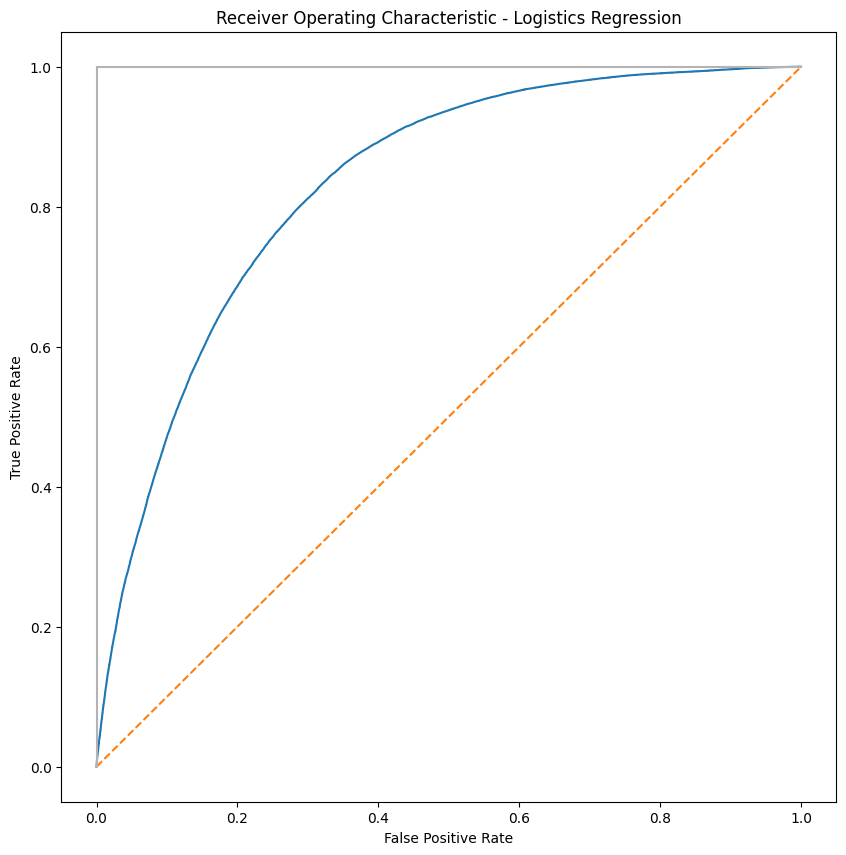

Test ROC AUC Score: 75.49%
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     87576
           1       0.74      0.78      0.76     87878

    accuracy                           0.75    175454
   macro avg       0.76      0.75      0.75    175454
weighted avg       0.76      0.75      0.75    175454

----Different scores----
Accuracy_score: 0.7549899118857364
Precission_score: 0.7437872007646522
Recall_score: 0.7792507794897472
F1-score: 0.7611061096106609


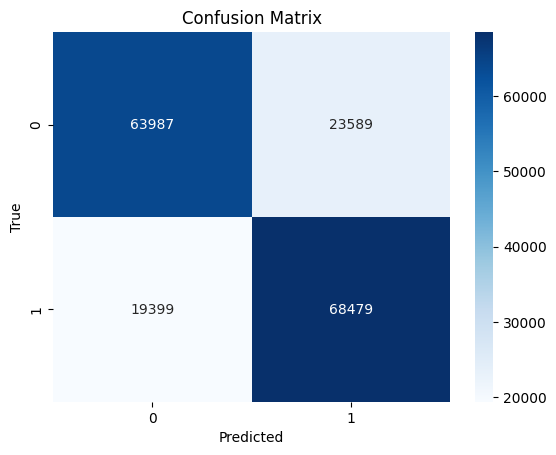

In [44]:
evaluating_model("Logistics Regression",y_test,prediction,predicted_proba)

## Decision Tree

In [45]:
prediction,predicted_proba= train_without_kfolds(decision_tree,x_train, y_train, x_test, y_test)

Threshold 0 -- 0.5
Threshold 0.1 -- 0.9010573942123226
Threshold 0.2 -- 0.9011774077976382
Threshold 0.30000000000000004 -- 0.9016743939134433
Threshold 0.4 -- 0.9020917045221057
Threshold 0.5 -- 0.902074635403555
Threshold 0.6 -- 0.9029509877597086
Threshold 0.7 -- 0.9028203207232126
Threshold 0.7999999999999999 -- 0.9027237919238181
Threshold 0.8999999999999999 -- 0.9025475483761356
Threshold 0.9999999999999999 -- 0.9025190998452176
---Optimum Threshold --- 0.6 --ROC-- 0.9029509877597086


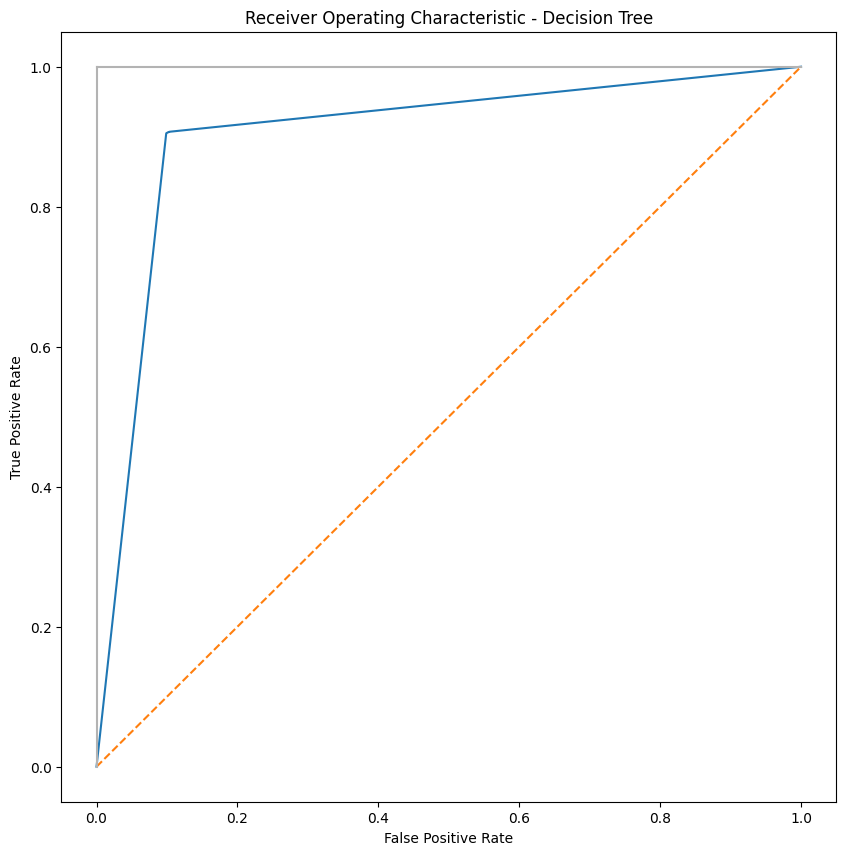

Test ROC AUC Score: 90.30%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     87576
           1       0.90      0.91      0.90     87878

    accuracy                           0.90    175454
   macro avg       0.90      0.90      0.90    175454
weighted avg       0.90      0.90      0.90    175454

----Different scores----
Accuracy_score: 0.9029660195834806
Precission_score: 0.9015380779126572
Recall_score: 0.905118459682742
F1-score: 0.9033247210471025


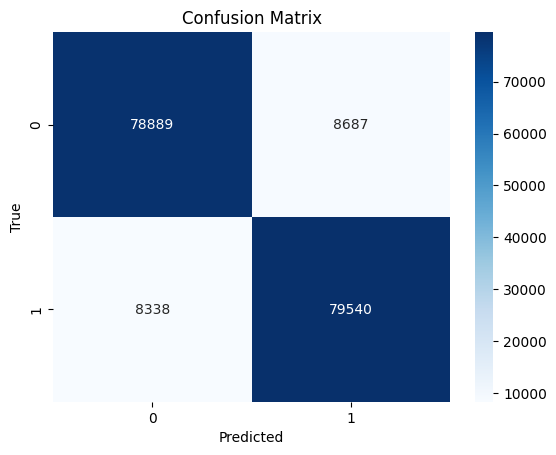

In [46]:
evaluating_model("Decision Tree",y_test,prediction,predicted_proba)

## KNN

In [47]:
prediction,predicted_proba= train_without_kfolds(knn,x_train, y_train, x_test, y_test)


Threshold 0 -- 0.5
Threshold 0.1 -- 0.8004872434749943
Threshold 0.2 -- 0.8004872434749943
Threshold 0.30000000000000004 -- 0.8364364816482325
Threshold 0.4 -- 0.8364364816482325
Threshold 0.5 -- 0.8619669451126856
Threshold 0.6 -- 0.8619669451126856
Threshold 0.7 -- 0.8701166903852623
Threshold 0.7999999999999999 -- 0.8701166903852623
Threshold 0.8999999999999999 -- 0.8328082140450855
Threshold 0.9999999999999999 -- 0.8328082140450855
---Optimum Threshold --- 0.7 --ROC-- 0.8701166903852623


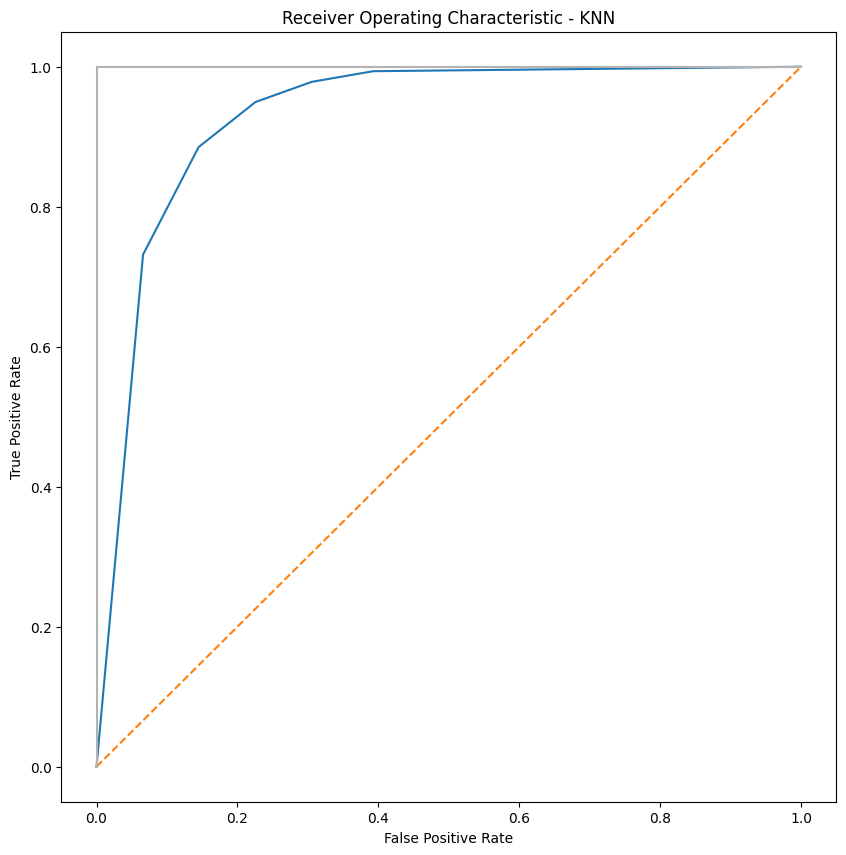

Test ROC AUC Score: 86.20%
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     87576
           1       0.81      0.95      0.87     87878

    accuracy                           0.86    175454
   macro avg       0.87      0.86      0.86    175454
weighted avg       0.87      0.86      0.86    175454

----Different scores----
Accuracy_score: 0.8621177060654075
Precission_score: 0.808544242471222
Recall_score: 0.9495550649764446
F1-score: 0.8733946682576067


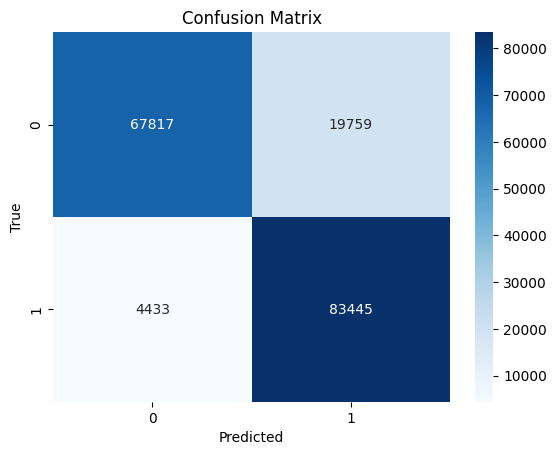

In [48]:
evaluating_model("KNN",y_test,prediction,predicted_proba)

## XGBoost

In [49]:
prediction,predicted_proba= train_without_kfolds(xgb,x_train, y_train, x_test, y_test)

Threshold 0 -- 0.5
Threshold 0.1 -- 0.778210902914469
Threshold 0.2 -- 0.8491557053466126
Threshold 0.30000000000000004 -- 0.8864053761019697
Threshold 0.4 -- 0.9054252648875536
Threshold 0.5 -- 0.9105743545190758
Threshold 0.6 -- 0.905418560888722
Threshold 0.7 -- 0.8957471209270702
Threshold 0.7999999999999999 -- 0.8872923551421648
Threshold 0.8999999999999999 -- 0.8719360932201461
Threshold 0.9999999999999999 -- 0.5015419103757482
---Optimum Threshold --- 0.5 --ROC-- 0.9105743545190758


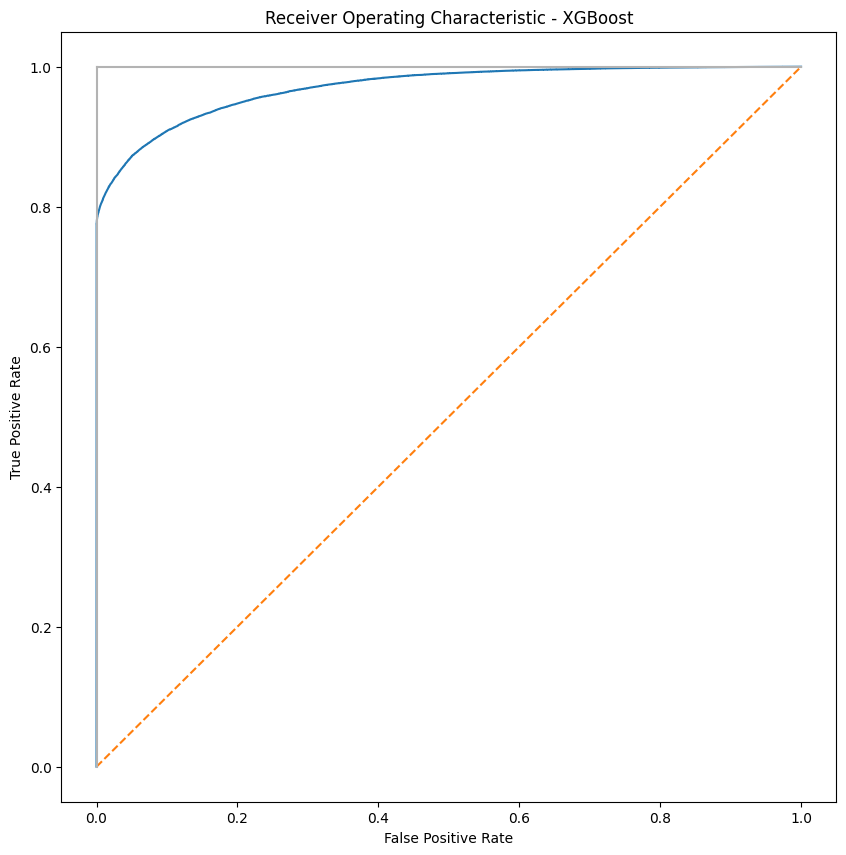

Test ROC AUC Score: 91.06%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     87576
           1       0.95      0.87      0.91     87878

    accuracy                           0.91    175454
   macro avg       0.91      0.91      0.91    175454
weighted avg       0.91      0.91      0.91    175454

----Different scores----
Accuracy_score: 0.9105007580334447
Precission_score: 0.9491344011748746
Recall_score: 0.8678167459432395
F1-score: 0.9066558875804717


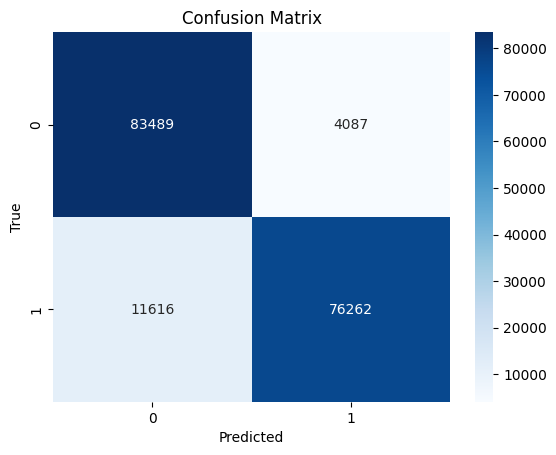

In [50]:
evaluating_model("XGBoost",y_test,prediction,predicted_proba)

## Random Forest


In [51]:
prediction,predicted_proba= train_without_kfolds(rf_sampled,x_train, y_train, x_test, y_test)

Threshold 0 -- 0.5
Threshold 0.1 -- 0.8365299101372784
Threshold 0.2 -- 0.8872304397615542
Threshold 0.30000000000000004 -- 0.91281987902904
Threshold 0.4 -- 0.924667321964686
Threshold 0.5 -- 0.929960006511057
Threshold 0.6 -- 0.9310406990748797
Threshold 0.7 -- 0.926909993045679
Threshold 0.7999999999999999 -- 0.912128882742142
Threshold 0.8999999999999999 -- 0.868888646671404
Threshold 0.9999999999999999 -- 0.6475368083397581
---Optimum Threshold --- 0.6 --ROC-- 0.9310406990748797


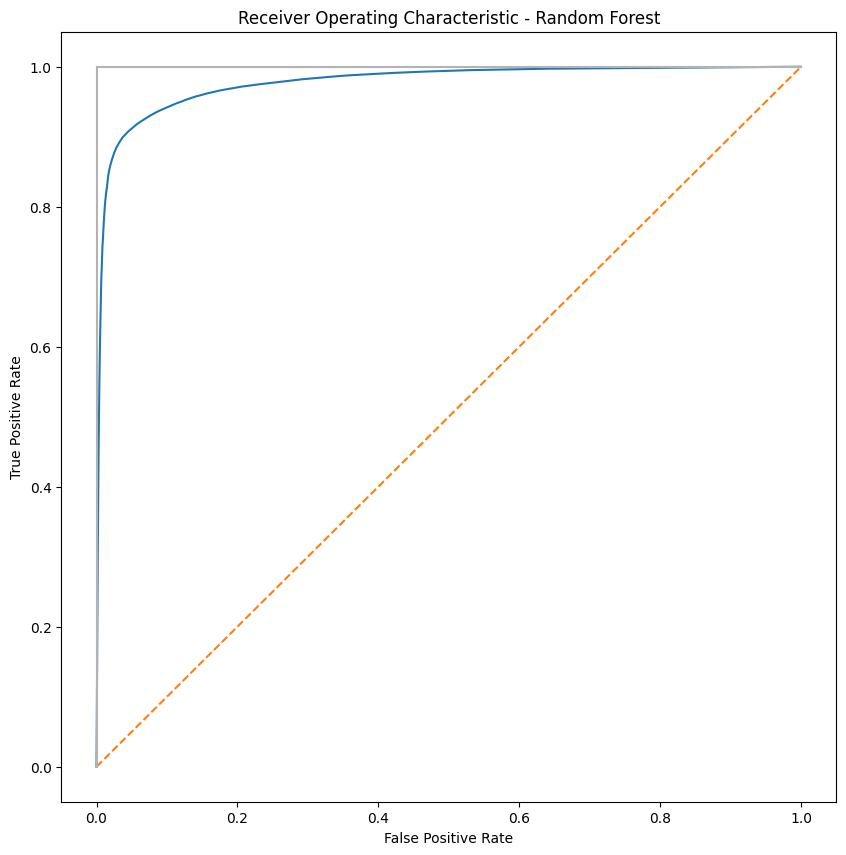

Test ROC AUC Score: 93.00%
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     87576
           1       0.94      0.92      0.93     87878

    accuracy                           0.93    175454
   macro avg       0.93      0.93      0.93    175454
weighted avg       0.93      0.93      0.93    175454

----Different scores----
Accuracy_score: 0.9299417511142521
Precission_score: 0.9394841500569807
Recall_score: 0.9193427251416737
F1-score: 0.9293043158185331


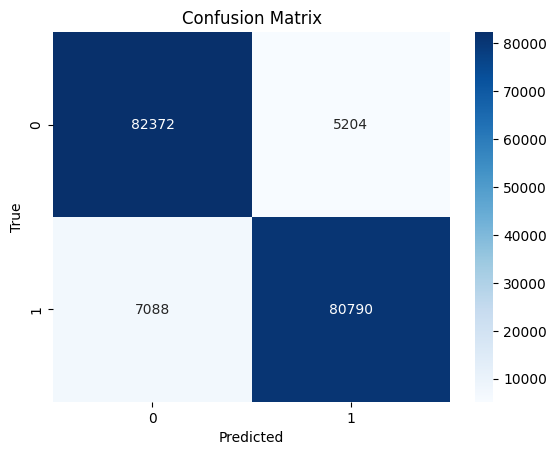

In [52]:
evaluating_model("Random Forest",y_test,prediction,predicted_proba)

## With oversampled train set only
- In this, we splitted the data first, then oversampled the train_set only to keep it realistic when testing the model on original test set
- This resulted in lower F1 of minority class due to imbalance in dataset but a higher score on majority class i.e. overfitting 

Threshold 0 -- 0.5
Threshold 0.1 -- 0.7089423922353086
Threshold 0.2 -- 0.7438616992458721
Threshold 0.30000000000000004 -- 0.7466607460690651
Threshold 0.4 -- 0.7339924400456747
Threshold 0.5 -- 0.7038162641562661
Threshold 0.6 -- 0.6521789819055804
Threshold 0.7 -- 0.5900546346575559
Threshold 0.7999999999999999 -- 0.5284831106350679
Threshold 0.8999999999999999 -- 0.5013961859963405
Threshold 0.9999999999999999 -- 0.5
---Optimum Threshold --- 0.30000000000000004 --ROC-- 0.7466607460690651


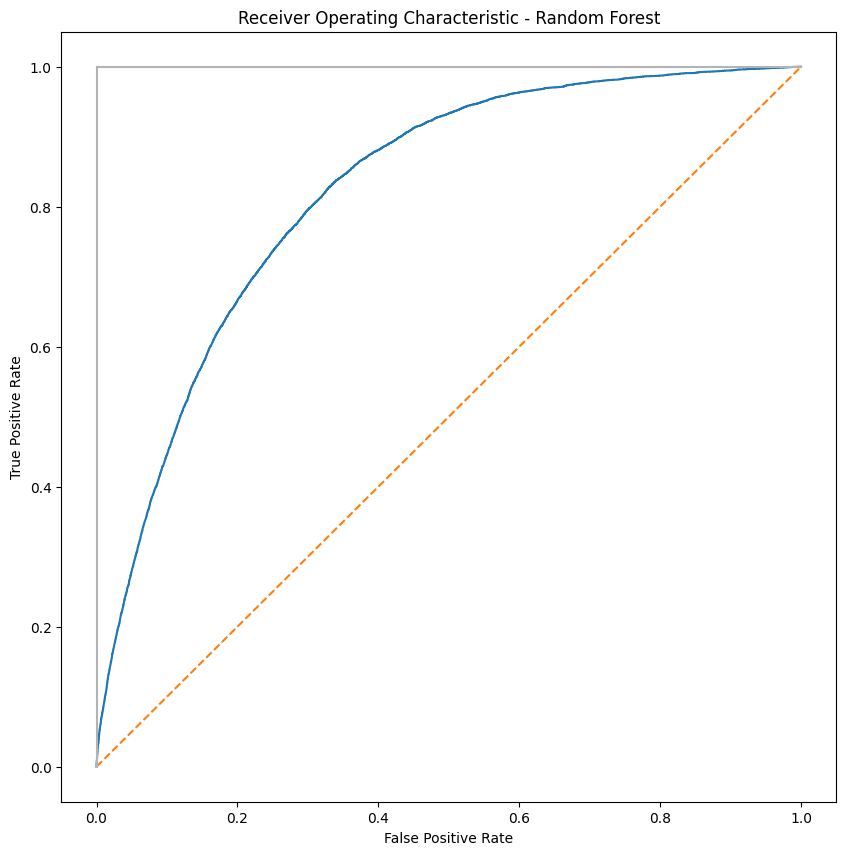

Test ROC AUC Score: 70.38%
              precision    recall  f1-score   support

           0       0.95      0.86      0.91     87649
           1       0.27      0.54      0.36      8290

    accuracy                           0.84     95939
   macro avg       0.61      0.70      0.64     95939
weighted avg       0.89      0.84      0.86     95939

----Different scores----
Accuracy_score: 0.8366878954335567
Precission_score: 0.27484130859375
Recall_score: 0.5431845597104946
F1-score: 0.36499959471508475


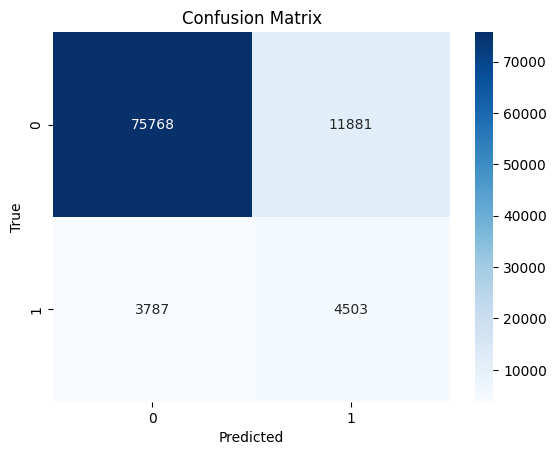

In [53]:
prediction,predicted_proba= train_without_kfolds(rf_nonsampled,x_train_robust, y_train_robust, x_test_robust, y_test_non)
evaluating_model("Random Forest",y_test_non,prediction,predicted_proba)

### Grid Search
- Done to find the best parameters through hyperparameter tuning

In [54]:
# param_grid = {
#     'n_estimators': [200,400,800,1000],
#     'max_depth': [None,15,20,25,30],
#     'max_features': ['sqrt'],
#     'criterion': ['entropy','gini'],
#     'class_weight': ['balanced', 'balanced_subsample']
# }

# rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# grid_search = GridSearchCV(
#     estimator=rf, 
#     param_grid=param_grid, 
#     scoring=make_scorer(f1_score, average='binary'),  
#     cv=5,  
#     verbose=2,  
#     n_jobs=-1 
# )

# grid_search.fit(x_train_smote, y_train_smote)

# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

# best_rf = grid_search.best_estimator_


<a id="title-six"></a>
<h1><center>Conclusion</center></h1>



- In conclusion, the machine learning project focused on addressing the challenge posed by an imbalanced dataset concerning the prediction of Heart Disease. The imbalance was primarily in the target variable, 'HeartDisease', which is a common issue in medical datasets where one class (usually the disease presence) is significantly underrepresented compared to the other.

- To tackle this, we employed the Synthetic Minority Over-sampling Technique (SMOTE), a widely recognized method for balancing class distribution. This approach artificially generates new instances of the underrepresented class, helping to mitigate the bias towards the majority class. After applying SMOTE, we used the train-test split method to ensure a fair evaluation of the model's performance on unseen data.

- Several machine learning models were tested, including K-Nearest Neighbors (KNN), Decision Tree, and Logistic Regression. Each model has its strengths and weaknesses, with varying performances depending on the characteristics of the data. However, in our case, the Random Forest classifier emerged as the most effective model. It not only provided the highest F1 score for both classes, indicating a robust balance between precision and recall, but also demonstrated the model's ability to generalize well to new data.

- The success of the Random Forest model in this context can be attributed to its nature as an ensemble learning method, where it combines multiple decision trees to produce a more accurate and stable prediction. This is particularly beneficial in dealing with imbalanced datasets, as it reduces the risk of overfitting to the majority class.

- Overall, this project highlights the importance of addressing data imbalances in machine learning, especially in sensitive domains like healthcare. By carefully preprocessing the data and choosing an appropriate model, we were able to develop a more reliable and accurate predictive tool for Heart Disease, which could potentially aid in early diagnosis and treatment planning.